<h1 style='font-size: 50px; text-align: center; font-family: 'Formata', serif;'>
    Analysis of Complex Data, Master in Data Science & Engineering, 2023-2024
</h1>

# 1. Import libraries, classes, custom functions and data load</h1>

In [2]:
import sys
import os

# Get the directory path of the notebook
notebook_directory = os.path.dirname(os.path.abspath("__file__"))

# Get the directory path of the project (one level up)
project_directory = os.path.dirname(notebook_directory)

# Add the project directory to the Python module search path
sys.path.append(project_directory)

# Now you can import the LoadJSON module from DataLoaderLocal
from shared_utilities.DataLoaderLocal import LoadReviews

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import nltk
from nltk.corpus import stopwords
from nltk import FreqDist, regexp_tokenize
from nltk.util import ngrams
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize, MWETokenizer, word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

import spacy
from spacy.lang.en import English
import utility_func as utils
from wordcloud import WordCloud
from langdetect import detect_langs
from gensim.models import Word2Vec
import xgboost as xgb

# Adjust display options to show all columns
pd.set_option('display.max_columns', None)

# 2. Data Understanding

## 2.1 Data Source and Description

In [3]:
############## Or go to Section 3 (DP - Data Preparation) to load a CSV file specifically created for the Recommendation System ##############
reviews = LoadReviews()
utils.YelpDatasets_Reviews(reviews_df = reviews)


Reviews DataFrame's head:


review_id                 user_id             business_id  \
2    saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
14   UBp0zWyH60Hmw6Fsasei7w  4Uh27DgGzsp6PqrH913giQ  otQS34_MymijPTdNBoBdCw   
75   ymhbOMW63B_vGaRFR3XT0A  yZdAhQ_KmKuCZmbBy9YDQg  5Ce3lZksYVkCbrihqylVHQ   
93   onlgwy5qGDEzddsrnIvtWg  pYXeL0RCqus2IfhthYCOyA  W7NxQw8UYFR0HLPrI08tvw   
147  ypFqmURIY41F4pWaMW1VrQ  hToW2eoTAYlOcuNz7I73Cg  7L1kXfwU5XM6f6Jxo_L7Yg   

     stars  useful  funny  cool  \
2        3       0      0     0   
14       4       0      2     0   
75       5       0      0     0   
93       4       0      0     0   
147      5       1      0     0   

                                                  text                date  
2    Family diner. Had the buffet. Eclectic assortm... 2014-02-05 20:30:30  
14   The bun makes the Sonoran Dog. It's like a snu... 2011-10-27 17:12:05  
75   I just started going to Sushi Nara this month ... 2014-07-25 17:56:26  
93   Don't know what it is but If my tummy's feelin... 2012-02-01 14:21:25  
147  We've been coming here since I was a kid. The ... 2015-07-03 22:36:04

In [61]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   stars        int64         
 4   useful       int64         
 5   funny        int64         
 6   cool         int64         
 7   text         object        
 8   date         datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 480.0+ MB


In [408]:
reviews.describe()

stars       useful        funny         cool
count  5000.000000  5000.000000  5000.000000  5000.000000
mean      3.758400     1.152400     0.320800     0.480400
std       1.481374     2.805984     1.506632     2.256155
min       1.000000     0.000000     0.000000     0.000000
25%       3.000000     0.000000     0.000000     0.000000
50%       4.000000     0.000000     0.000000     0.000000
75%       5.000000     1.000000     0.000000     0.000000
max       5.000000    88.000000    55.000000    95.000000

## 2.2 Exploratory Data Analysis

In [4]:
reviews = reviews.sample(n=5000, random_state=42)
display(reviews)
reviews.describe()

review_id                 user_id  \
1295256  J5Q1gH4ACCj6CtQG7Yom7g  56gL9KEJNHiSDUoyjk2o3Q   
3297618  HlXP79ecTquSVXmjM10QxQ  bAt9OUFX9ZRgGLCXG22UmA   
1217795  JBBULrjyGx6vHto2osk_CQ  NRHPcLq2vGWqgqwVugSgnQ   
3730348  U9-43s8YUl6GWBFCpxUGEw  PAxc0qpqt5c2kA0rjDFFAg   
1826590  8T8EGa_4Cj12M6w8vRgUsQ  BqPR1Dp5Rb_QYs9_fz9RiA   
...                         ...                     ...   
5884448  bXXRzBg7DuGnY8ij4INBWg  9fP3KiiVpFVYcnqgD3aZJw   
6745875  FkekUQC8z63ywSFQnK4Z4w  JLW2uULP_Q1KXHhToNljcQ   
5730804  4IzbwfjgwUq1gXKA97Erwg  lESGYBwhs9ZtpWeJf_2Zig   
1995249  23xRe5HtAsPlHyUuM7AFTQ  5pgl40PSrB-dTbEg-eWIFA   
6544963  vLxH2ifmZw8htzm_WZCGVw  W0DJOPsSwcAj0uqCJG8iLw   

                    business_id  stars  useful  funny  cool  \
1295256  8yR12PNSMo6FBYx1u5KPlw      2       1      0     0   
3297618  pBNucviUkNsiqhJv5IFpjg      5       0      0     0   
1217795  8sf9kv6O4GgEb0j1o22N1g      5       0      0     0   
3730348  XwepyB7KjJ-XGJf0vKc6Vg      4       0      0     0   
1826590  prm5wvpp0OHJBlrvTj9uOg      5       0      0     0   
...                         ...    ...     ...    ...   ...   
5884448  iaBU5h_j0TCrUFzTbjFIlw      3       9      0     0   
6745875  jMStvE-tQzSpRCAO0nAE6g      3       5      2     8   
5730804  hGCETx03FN8Qtx1T8StHaQ      5       0      0     0   
1995249  ecapYwbEvmKHKAfsGA4tow      4       3      0     0   
6544963  aGOXuqO6yhN66tLYI61Thg      2       1      0     0   

                                                      text                date  
1295256  Went for lunch and found that my burger was me... 2018-04-04 21:09:53  
3297618  I needed a new tires for my wife's car. They h... 2020-05-24 12:22:14  
1217795  Jim Woltman who works at Goleta Honda is 5 sta... 2019-02-14 03:47:48  
3730348  Been here a few times to get some shrimp.  The... 2013-04-27 01:55:49  
1826590  This is one fantastic place to eat whether you... 2019-05-15 18:29:25  
...                                                    ...                 ...  
5884448  I am not sure what to think of this place. I b... 2013-04-09 22:29:48  
6745875  I'm so excited to see the red Robin had re-ope... 2018-09-27 23:47:13  
5730804  This is our go-to pizza place!  We love their ... 2018-09-05 23:00:37  
1995249  This is located in a great spot fairly close t... 2014-02-13 22:54:43  
6544963  I went in for a sirloin burger and a salad. Th... 2015-05-08 02:42:30  

[5000 rows x 9 columns]

stars       useful        funny         cool
count  5000.000000  5000.000000  5000.000000  5000.000000
mean      3.758400     1.152400     0.320800     0.480400
std       1.481374     2.805984     1.506632     2.256155
min       1.000000     0.000000     0.000000     0.000000
25%       3.000000     0.000000     0.000000     0.000000
50%       4.000000     0.000000     0.000000     0.000000
75%       5.000000     1.000000     0.000000     0.000000
max       5.000000    88.000000    55.000000    95.000000

### 2.2.1 Distribution of reviews and stars

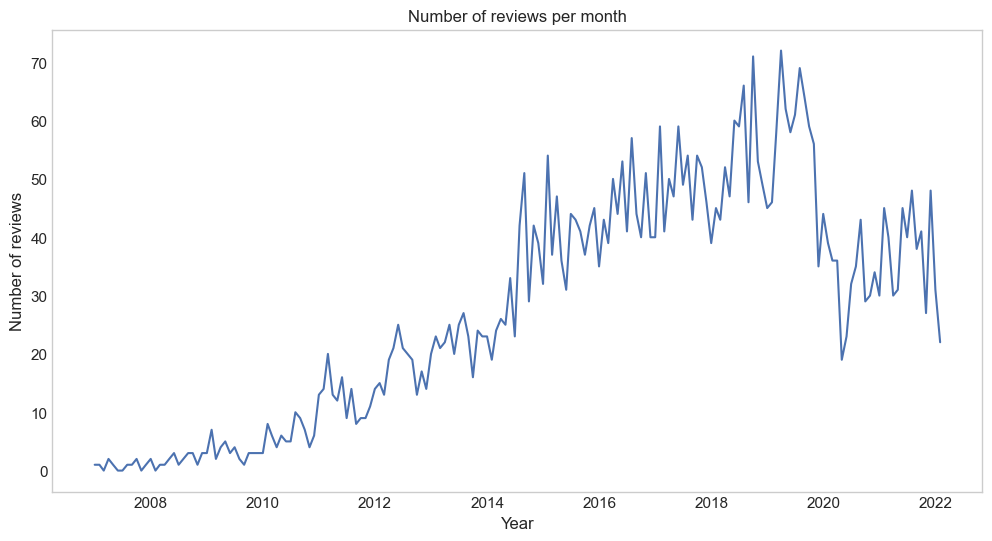

In [436]:
reviews['date'] = pd.to_datetime(reviews['date'])
df = reviews.set_index('date')

# Set the background to white
plt.figure(figsize=(12, 6))
plt.rcParams['axes.facecolor'] = 'white' # Set background to white

# Create the line graph
plt.plot(df['text'].resample('M').count())

# Remove the grids
plt.grid(False)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of reviews')
plt.title('Number of reviews per month')

# Show the graph
plt.show()

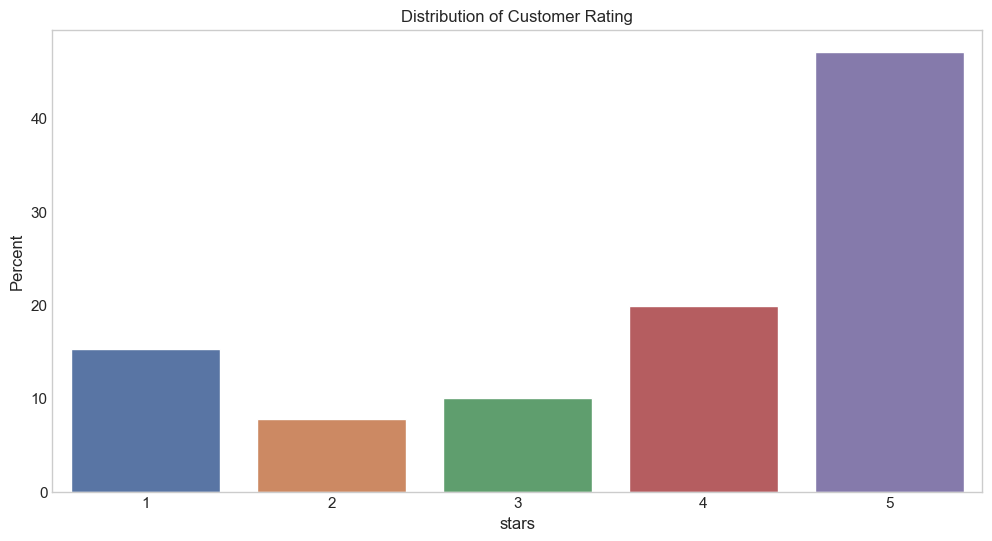

In [440]:
# Set the background to white
plt.figure(figsize=(12, 6))
plt.rcParams['axes.facecolor'] = 'white' # Set background to white

# Create the bar chart
ax = sns.barplot(data=reviews, x='stars', y='stars', estimator=lambda x: len(x) / len(reviews) * 100)

# Remove the grids
ax.grid(False)

# Set the ylabel, title and display the graph
ax.set(ylabel="Percent")
plt.title('Distribution of Customer Rating')
plt.show()

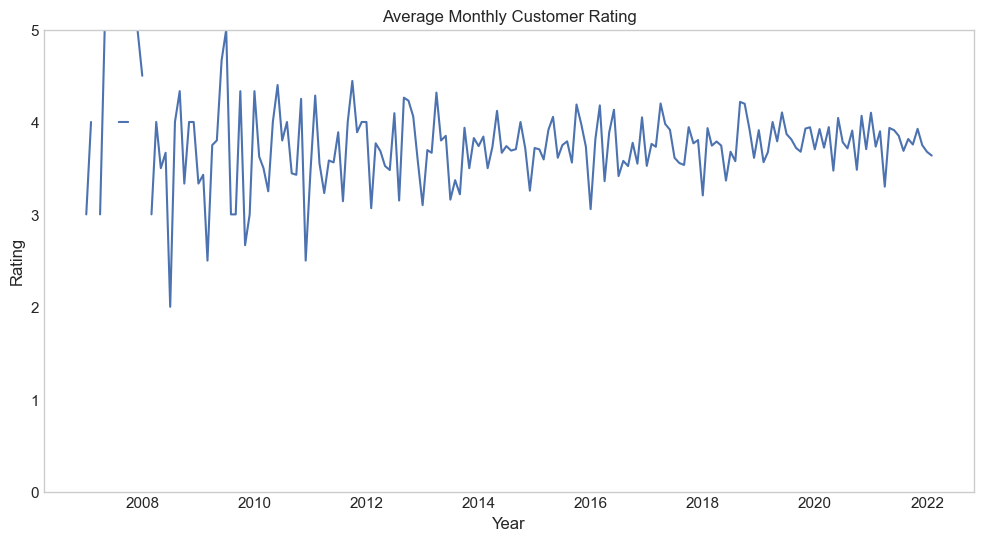

In [439]:
# Set the background to white
plt.figure(figsize=(12, 6))
plt.rcParams['axes.facecolor'] = 'white' # Set background to white

# Create the line graph
plt.plot(df['stars'].resample('M').mean())

# Remove the grids
plt.grid(False)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Average Monthly Customer Rating')
plt.ylim(0, 5)

# Show the graph
plt.show()

 ### 2.2.2 Text Length

#### 2.2.2.1 To get an insight on the length of each review, we can create a new column in yelp called text length. This column will store the number of characters in each review.

In [446]:
reviews['text length'] = reviews['text'].apply(len)
reviews.head()

review_id                 user_id  \
3794719  O6bpWULxbI9-0ZgAz7hYcQ  dxGxq_KX9j9KvKO0GMyvRw   
2716988  e8tzUrpjac5Uqg6OytCwEQ  tWdxHG8-UGJncCp-BgJIhg   
2932156  2rZ5lltnzlBfE2jEgQ102g  h0i0cpoCmiwOwERRI2yWpA   
702597   Ke1esEdGLpXw9zpufBgIrw  koYnchCFCDXo0ac0sgFhlA   
4830413  1dTBYUD5zkb2kFo7ztu-3Q  4ExV-552BD1zk3TBBOa1gg   

                    business_id  stars  useful  funny  cool  \
3794719  -0EdehHjIQc0DtYU8QcAig      5       0      0     0   
2716988  Z4PF4EtM12L7nwOHZHFJNA      2       1      0     0   
2932156  mpf51URhzEQQjc186BKUcA      2       1      0     0   
702597   coR0dFgGOU7fVku6xDdH-A      1       1      0     0   
4830413  LYgLZ6mMp15rpMJqOEEKPQ      1       0      0     0   

                                                      text  \
3794719  Have eaten at New Tung Tung for several years ...   
2716988  I've been vegan/vegetarian for 21 yrs and was ...   
2932156  Service was absolutely great. Our waitress was...   
702597   As a drop in, I could not understand how peopl...   
4830413  In response to my prior review one of the owne...   

                       date  text length  
3794719 2018-12-04 22:41:28          178  
2716988 2016-08-15 01:37:59          779  
2932156 2017-10-06 19:41:28          560  
702597  2012-11-02 07:43:16          210  
4830413 2021-11-01 21:51:36          896

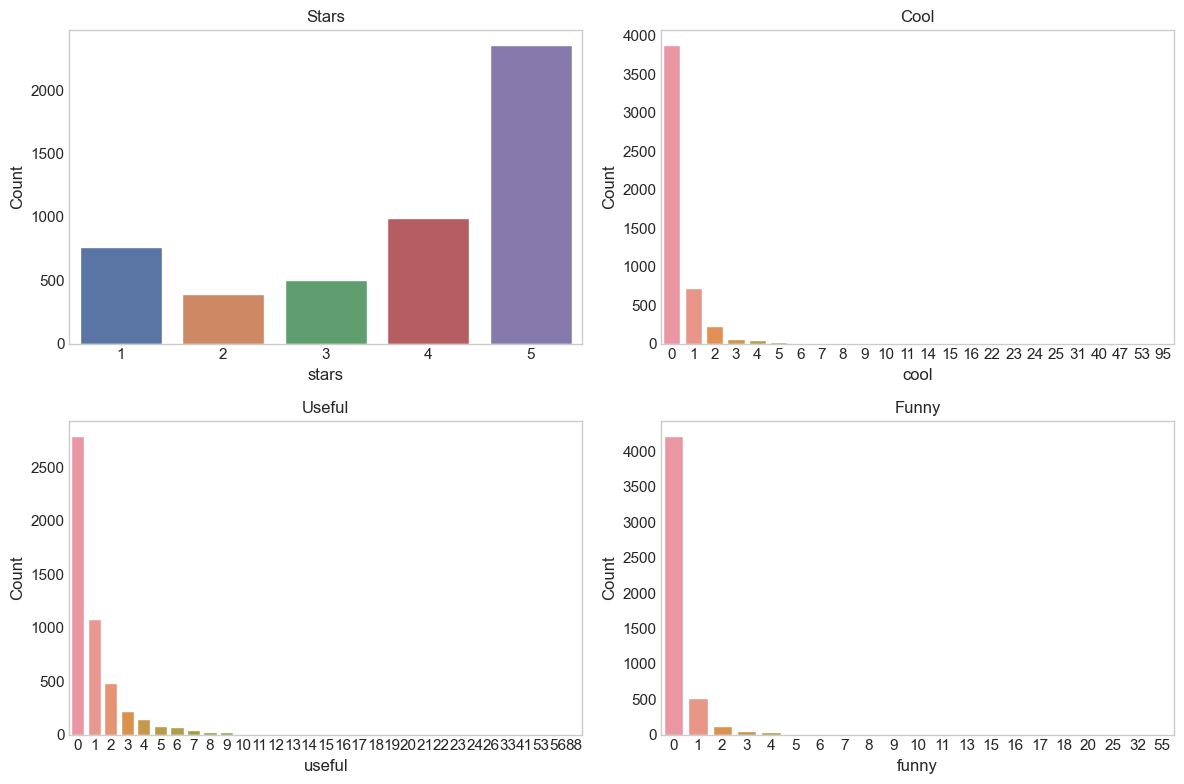

In [441]:
# Set the background as white
fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('white')  # Define o fundo como branco

# Subplot 1
axes1 = plt.subplot(2, 2, 1)
axes1 = sns.countplot(x='stars', data=reviews)
axes1.set_title('Stars')
axes1.set_ylabel('Count')

# Subplot 2
axes2 = plt.subplot(2, 2, 2)
axes2 = sns.countplot(x='cool', data=reviews)
axes2.set_title('Cool')
axes2.set_ylabel('Count')

# Subplot 3
axes3 = plt.subplot(2, 2, 3)
axes3 = sns.countplot(x='useful', data=reviews)
axes3.set_title('Useful')
axes3.set_ylabel('Count')

# Subplot 4
axes4 = plt.subplot(2, 2, 4)
axes4 = sns.countplot(x='funny', data=reviews)
axes4.set_title('Funny')
axes4.set_ylabel('Count')

plt.tight_layout()

# Remova all the grids
for ax in [axes1, axes2, axes3, axes4]:
    ax.grid(False)

# Show all the plots
plt.show()

#### 2.2.2.2 Seaborn’s FacetGrid allows us to create a grid of histograms placed side by side. We can use FacetGrid to see if there’s any relationship between our newly created text length feature and the stars rating.

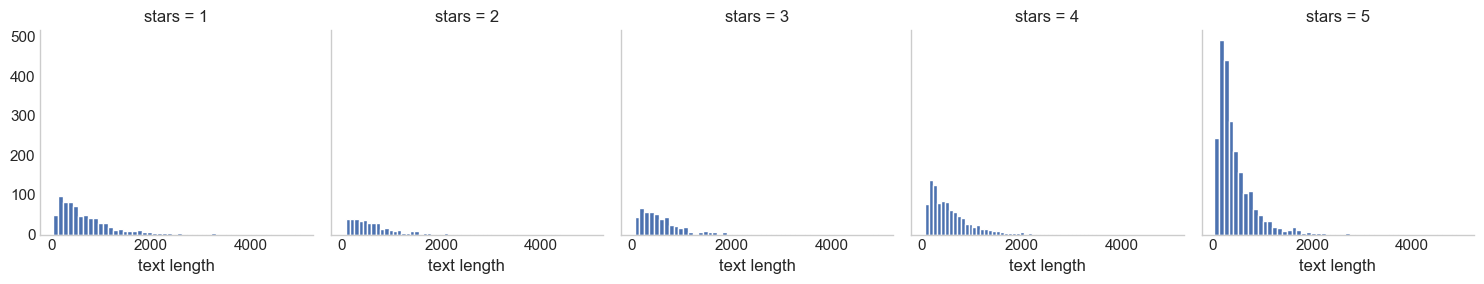

In [447]:
# Configuração do estilo do seaborn para definir o fundo como branco
sns.set_style("whitegrid")

# Crie o FacetGrid
g = sns.FacetGrid(data=reviews, col='stars')

# Mapeie o histograma
g.map(plt.hist, 'text length', bins=50)

# Remova as grades em todos os subplots
for ax in g.axes.flat:
    ax.grid(False)

# Exiba o FacetGrid
plt.show()

C:\Users\pport\AppData\Local\Temp\ipykernel_19612\2696079039.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(reviews['text length'], kde=True, bins=50)


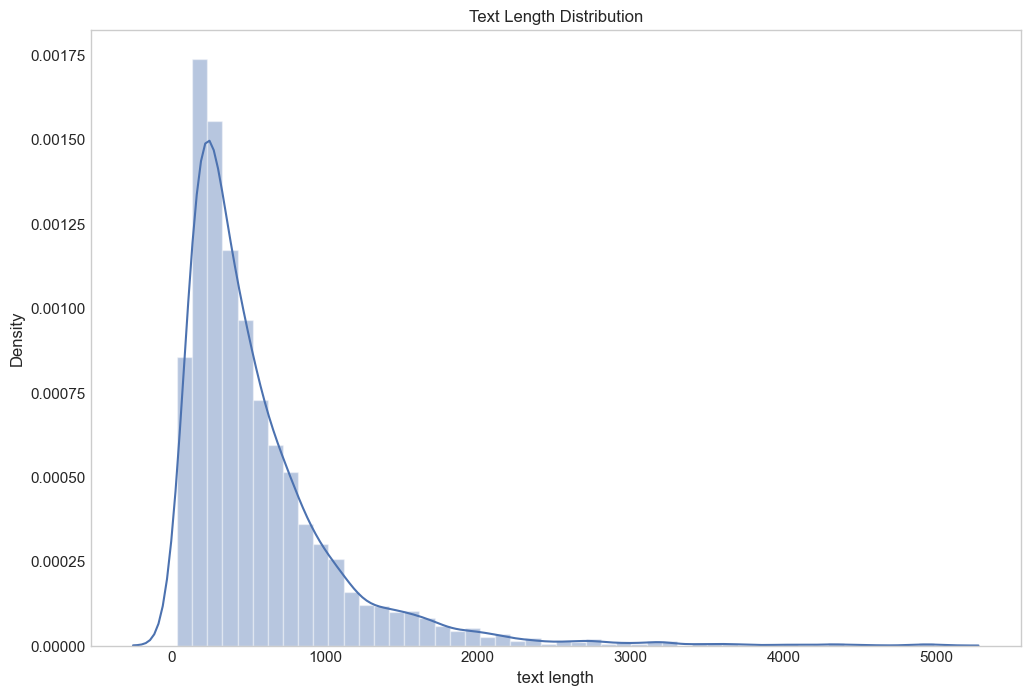

In [449]:
# Setting the seaborn style to set the background to white
sns.set_style("whitegrid")

# Create the figure
fig = plt.figure(figsize=(12, 8))

# Create the distribution graph
sns.distplot(reviews['text length'], kde=True, bins=50)

# Remove the grids
plt.grid(False)

# Add the title
plt.title('Text Length Distribution')

# Display the graph
plt.show()

#### 2.2.2.3 Seems like overall, the distribution of text length is similar across all five ratings. However, the number of text reviews seems to be skewed a lot higher towards the 4-star and 5-star ratings. This may cause some issues later on in the process.

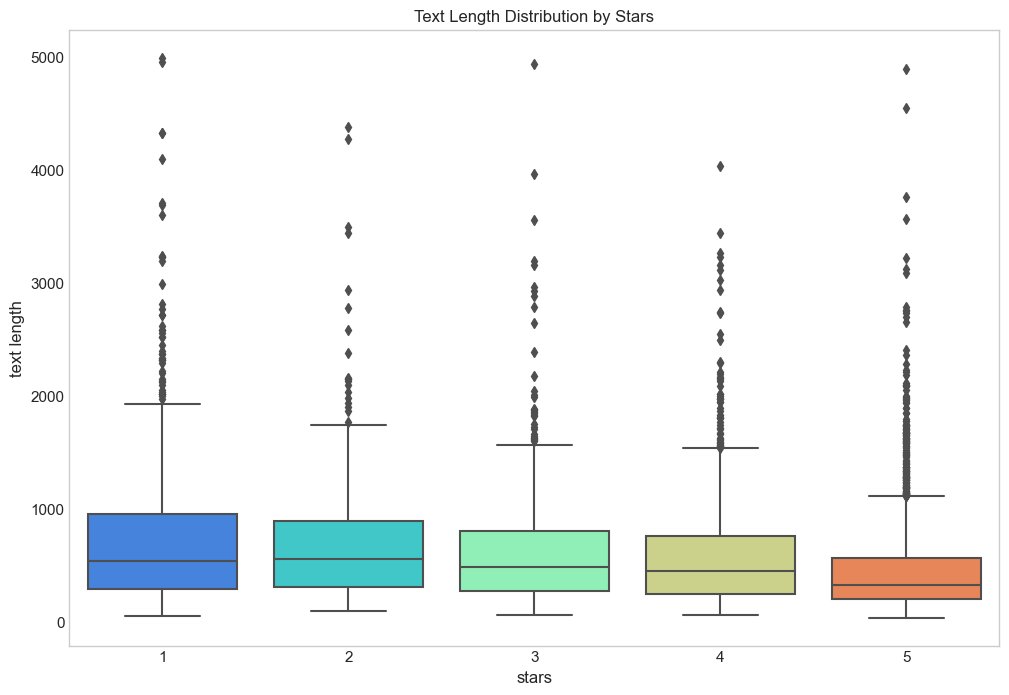

In [451]:
# Setting the seaborn style to set the background to white
sns.set_style("whitegrid")

# Create the figure
fig = plt.figure(figsize=(12, 8))

# Create the box plot
sns.boxplot(x='stars', y='text length', data=reviews, palette='rainbow')

# Remove the grids
plt.grid(False)

# Add the title
plt.title('Text Length Distribution by Stars')

# Display the graphic
plt.show()

#### 2.2.2.4 Let’s group the data by the star rating, and see if we can find a correlation between features such as cool, useful, and funny. We can use the .corr()method from Pandas to find any correlations in the dataframe.

In [72]:
stars = reviews.groupby('stars').mean()
stars.corr()

useful     funny      cool  text length
useful       1.000000  0.994864 -0.653334     0.808545
funny        0.994864  1.000000 -0.624593     0.831117
cool        -0.653334 -0.624593  1.000000    -0.822301
text length  0.808545  0.831117 -0.822301     1.000000

#### 2.2.2.5 To visualise these correlations, we can use Seaborn’s heatmap. Looking at the map, funny is strongly correlated with useful, and usefulseems strongly correlated with text length. We can also see a negative correlation between cool and the other three features.

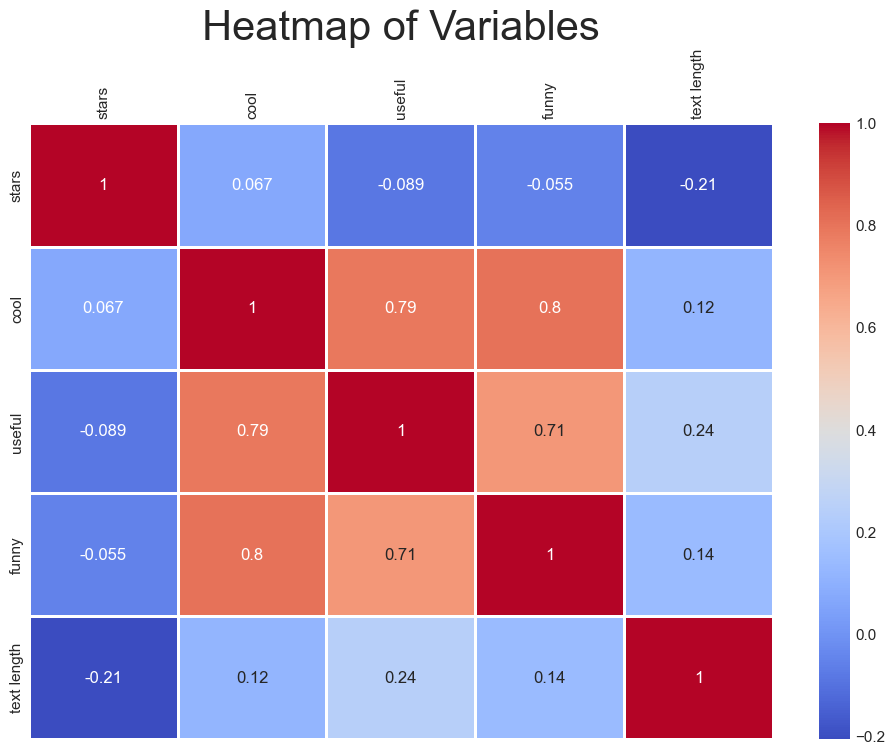

In [452]:
# Setting the seaborn style to set the background to white
sns.set_style("whitegrid")

# Create the heatmap graphic
yelp_cor = reviews[['stars', 'cool', 'useful', 'funny', 'text length']].corr()

fig = plt.figure(figsize=(12, 8))
axes = sns.heatmap(yelp_cor, cmap='coolwarm', linewidth=1, linecolor='white', annot=True)

# Remove the grids
axes.xaxis.set_ticks_position('top')
axes.xaxis.set_tick_params(rotation=90)
axes.yaxis.set_ticks_position('left')

# Add the title
axes.set_title('Heatmap of Variables', fontsize=30)

# Display the graph
plt.show()

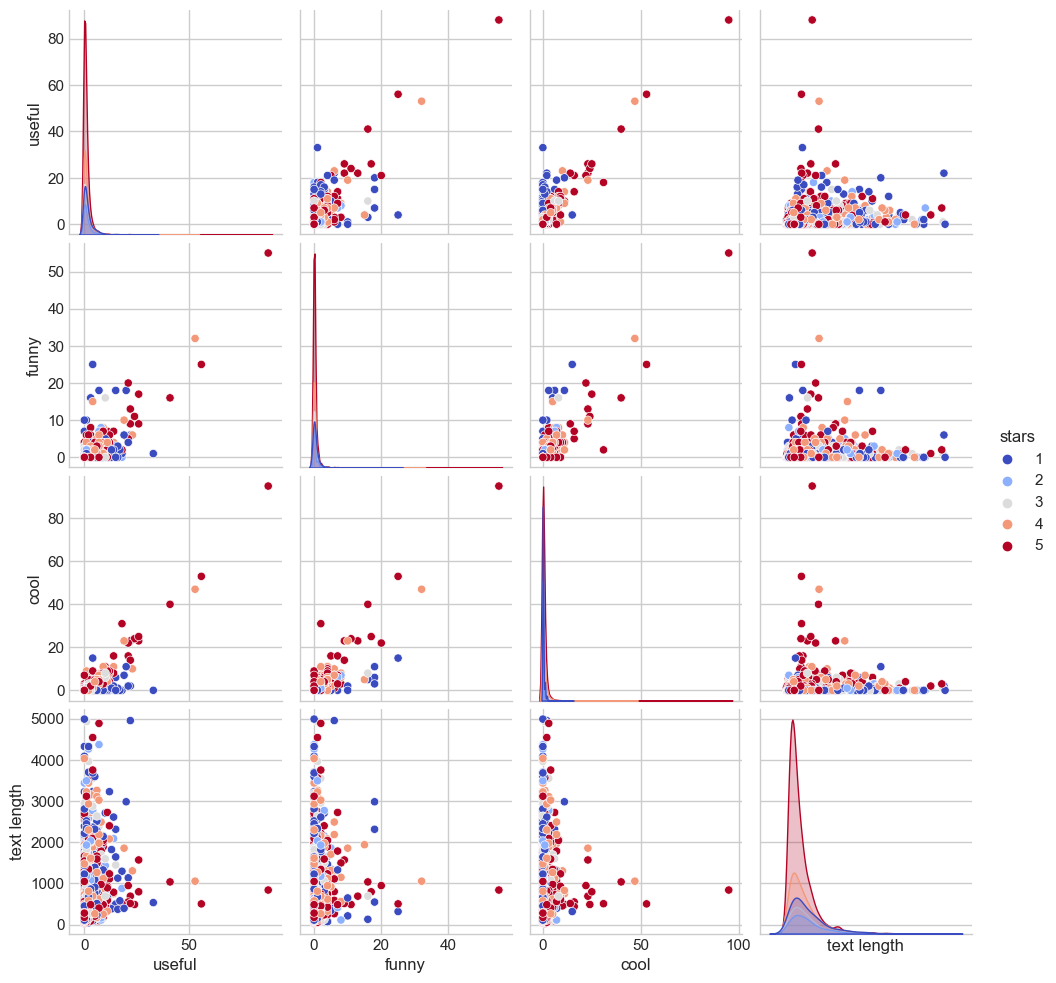

In [455]:
# Setting the seaborn style to set the background to white
sns.set_style("whitegrid")

# Create the pairplot graph
sns.pairplot(reviews, hue='stars', palette='coolwarm')

# Remove the grids from the x and y axes
plt.xticks([])
plt.yticks([])

# Remove the grids
plt.grid(False)

# Display the graph
plt.show()

## 2.3 Data cleaning

### 2.3.1 Let's start by removing any non-alpha chars, using a regular expression. We'll create a separate corpus (a list of reviews), so that we leave the original dataset untouched.

In [5]:
def clean_text(text):
    cleaned_text = re.sub('[^a-zA-Z]', ' ', text)
    return cleaned_text

# Apply the text cleaning function to the 'text' column of the reviews DataFrame
reviews['text'] = reviews['text'].apply(clean_text)

### 2.3.2 In the review, some character references such as “&amp;amp;” are not useful in our text content and we removed them.

In [6]:
reviews['text'] = [i.replace("&amp;amp;", '').replace("\'",'') for i in reviews['text']]

### 2.3.3 Next, we wanted to make sure all the reviews are in English and we did the language detection with a library called langdetect and the specific function detect_langs.

In [7]:
language = [detect_langs(i) for i in reviews.text]
languages = [str(i[0]).split(':')[0] for i in language]
reviews['language'] = languages

### 2.3.4 Next, we can convert all letters to lowercase, ensuring that words like "Amazing," "AMAZING," and "amazing" are all represented in the same way.

In [8]:
# Convert all letters to lowercase
reviews['text'] = reviews['text'].str.lower()

# 3. Text Mining

## 3.1 Stopwords

In [79]:
my_stop_words = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS) + ['super', 'duper', 'place', 'br', 'href', 'good', 'great'])

## 3.2 Word Cloud

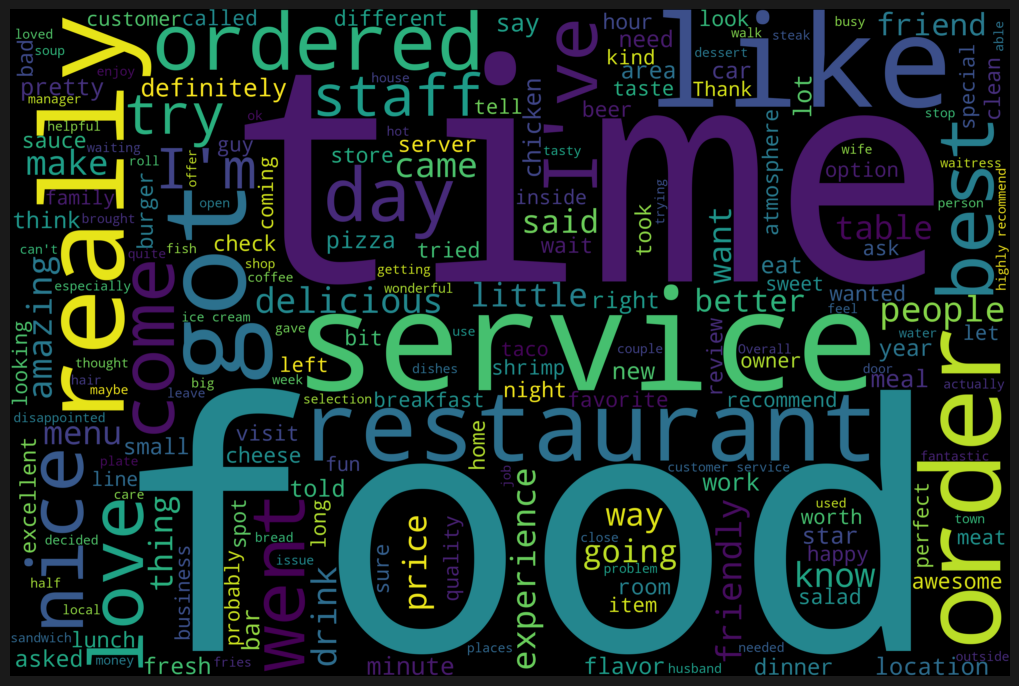

In [409]:
# concatenate all the reviews into one single string 
full_text = ' '.join(reviews['text'])
wordcloud = WordCloud( width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords=my_stop_words).generate(full_text)
fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

### 3.2.1 Positive Reviews (4 and 5 Stars)

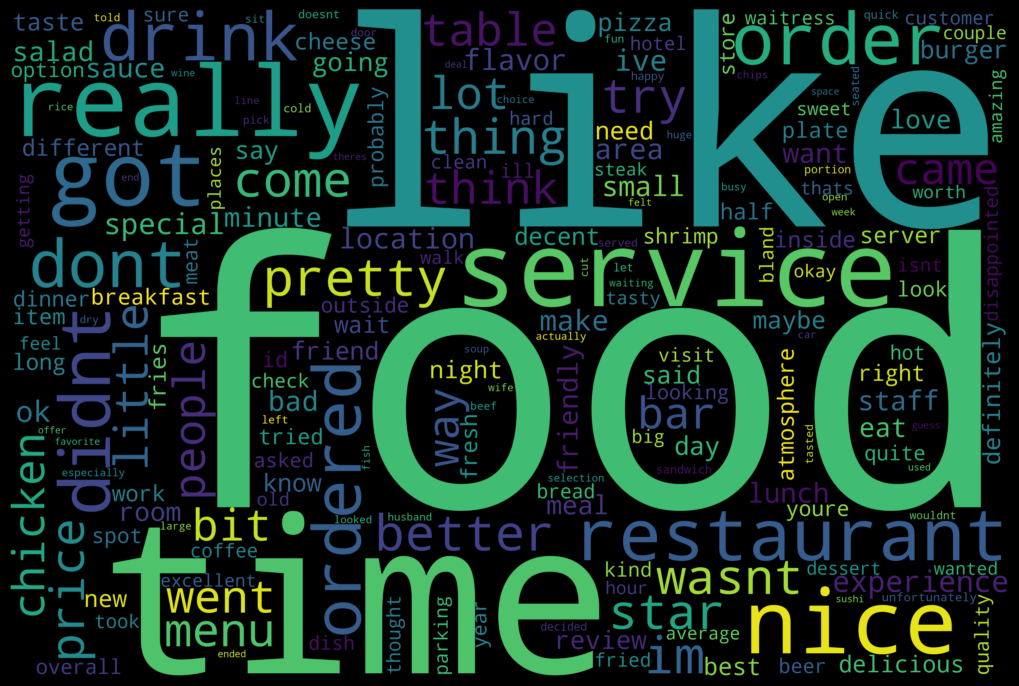

In [ ]:
# Filter the reviews DataFrame to include only reviews with star ratings 1 or 2
filtered_reviews = reviews[reviews['stars'].isin([4, 5])]

# Concatenate the text of the filtered reviews into one single string
full_text_positive = ' '.join(filtered_reviews['text'])

# Create the word cloud using the filtered text
wordcloud = WordCloud(
    width=3000,
    height=2000,
    background_color='black',
    stopwords=my_stop_words
).generate(full_text)

# Plot the word cloud
fig = plt.figure(
    figsize=(10, 7),
    facecolor='k',
    edgecolor='k'
)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### 3.2.2 Negative Reviews (1 and 2 Stars)

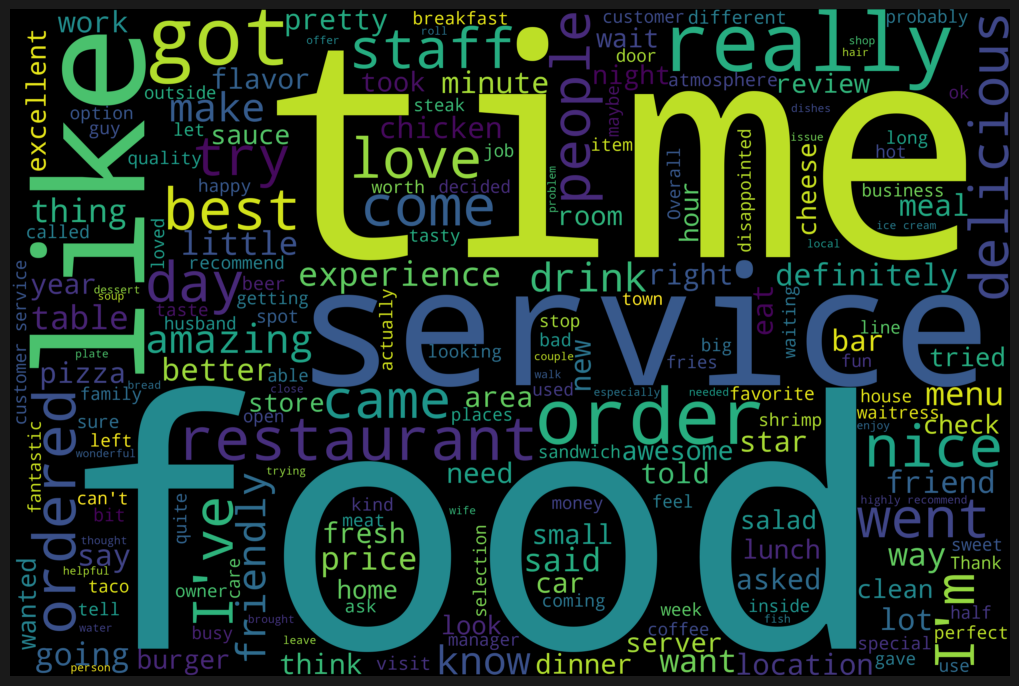

In [410]:
# Filter the reviews DataFrame to include only reviews with star ratings 1 or 2
filtered_reviews = reviews[reviews['stars'].isin([1, 2])]

# Concatenate the text of the filtered reviews into one single string
full_text_negative = ' '.join(filtered_reviews['text'])

# Create the word cloud using the filtered text
wordcloud = WordCloud(
    width=3000,
    height=2000,
    background_color='black',
    stopwords=my_stop_words
).generate(full_text)

# Plot the word cloud
fig = plt.figure(
    figsize=(10, 7),
    facecolor='k',
    edgecolor='k'
)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### 3.2.3 Neutral Reviews (3 Stars)

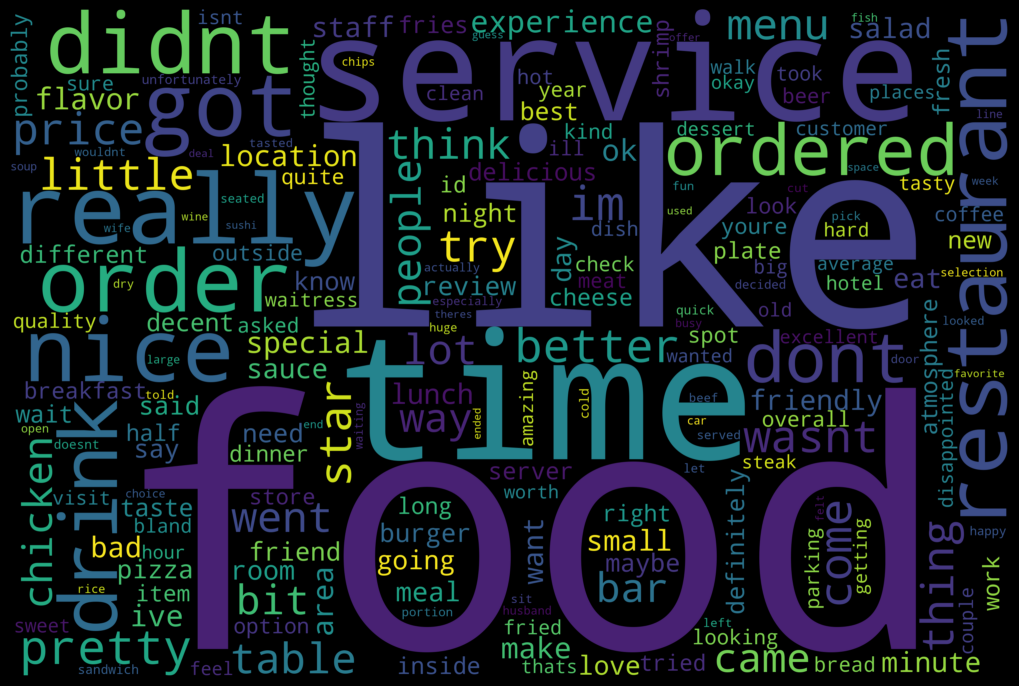

In [ ]:
# Filter the reviews DataFrame to include only reviews with star ratings 1 or 2
filtered_reviews = reviews[reviews['stars'].isin([3])]

# Concatenate the text of the filtered reviews into one single string
full_text_neutral = ' '.join(filtered_reviews['text'])

# Create the word cloud using the filtered text
wordcloud = WordCloud(
    width=3000,
    height=2000,
    background_color='black',
    stopwords=my_stop_words
).generate(full_text)

# Plot the word cloud
fig = plt.figure(
    figsize=(10, 7),
    facecolor='k',
    edgecolor='k'
)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## 3.3 Tokenization and Vectorization

### 3.3.1 Bag-of-Words 

In [411]:
nltk.download('punkt')
word_tokens = word_tokenize(full_text)
tokens = list()
for word in word_tokens:
    if word.isalpha() and word not in my_stop_words:
        tokens.append(word)
token_dist = FreqDist(tokens)
dist = pd.DataFrame(token_dist.most_common(20),columns=['Word', 'Frequency'])

word_pairs = list(ngrams(tokens, 2))

# Calculate the frequency distribution of pairs of 2 words
bigram_dist = FreqDist(word_pairs)
dist_pair = pd.DataFrame(bigram_dist.most_common(20),columns=['Words', 'Frequency'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pport\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


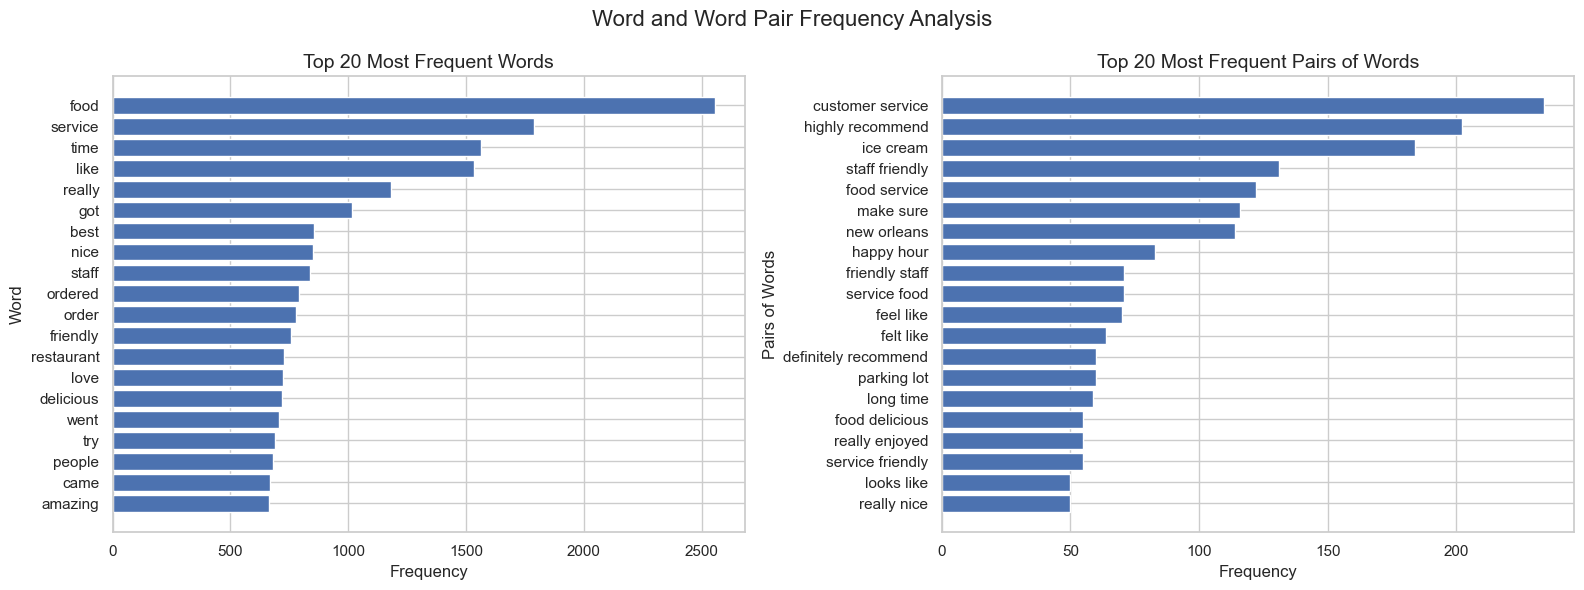

In [83]:
# Create a figure with two subplots (one for the top 20 words and one for the top 20 bigrams)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Plot the top 20 words
axes[0].barh(dist['Word'], dist['Frequency'])
axes[0].invert_yaxis()
axes[0].set_xlabel('Frequency', fontsize=12)
axes[0].set_ylabel('Word', fontsize=12)
axes[0].set_title('Top 20 Most Frequent Words', fontsize=14)

# Convert the tuples in 'dist_pair['Words']' to strings
bigram_strings = [' '.join(pair) for pair in dist_pair['Words']]

# Plot the top 20 bigrams
axes[1].barh(bigram_strings, dist_pair['Frequency'])
axes[1].invert_yaxis()
axes[1].set_xlabel('Frequency', fontsize=12)
axes[1].set_ylabel('Pairs of Words', fontsize=12)
axes[1].set_title('Top 20 Most Frequent Pairs of Words', fontsize=14)

# Adjust the spacing between subplots
plt.suptitle('Word and Word Pair Frequency Analysis', fontsize=16)
plt.tight_layout()

# Show the plots
plt.show()

#### 3.3.1.1 Stemming - Stemming is a technique that aims to remove the suffixes from a word to find its root (or "stem"). The goal is to group words with similar forms, even if they are not the same word. 

In [84]:
porter = PorterStemmer()
stemmed_tokens =[porter.stem(word) for word in tokens]
stemmed_token_dist = FreqDist(stemmed_tokens)
stemmed_dist = pd.DataFrame(stemmed_token_dist.most_common(20),columns=['Word', 'Frequency'])

# Aplicar stemming aos pares de palavras (bigrams)
stemmed_bigram_dist = FreqDist([(porter.stem(word1), porter.stem(word2)) for word1, word2 in word_pairs])
stemmed_dist_pair = pd.DataFrame(stemmed_bigram_dist.most_common(20), columns=['Words', 'Frequency'])

C:\Users\pport\AppData\Local\Temp\ipykernel_19612\4000474200.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


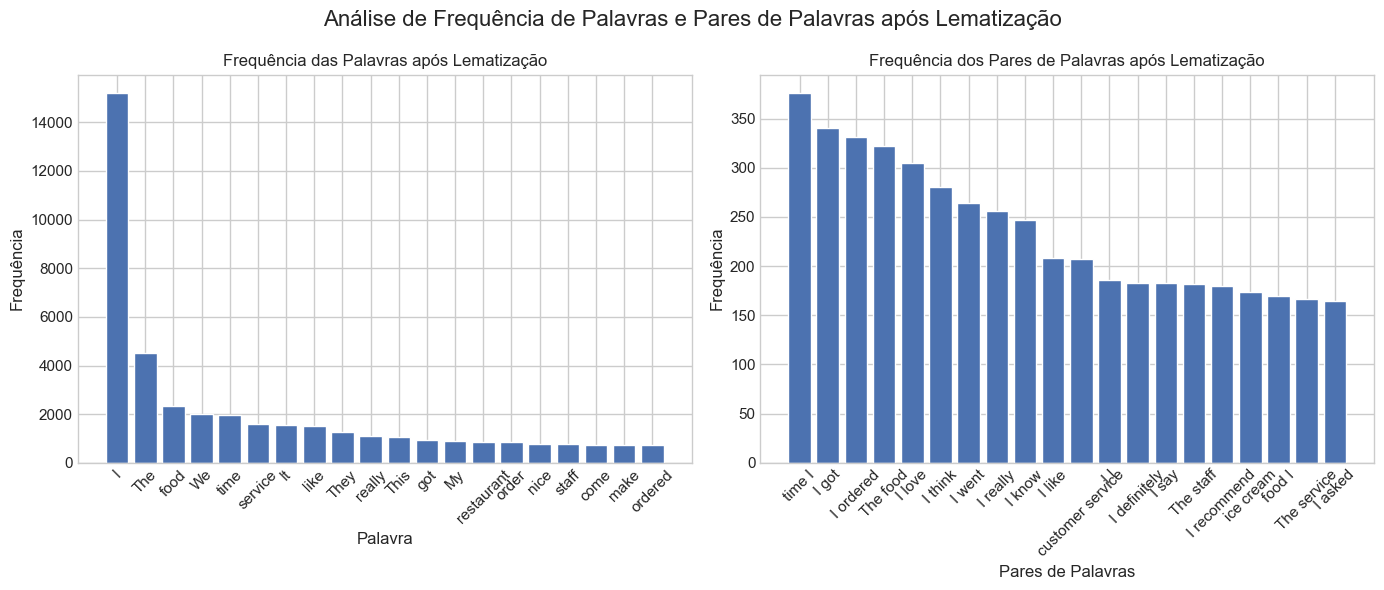

In [416]:
# Defina o estilo de fundo como 'seaborn-whitegrid'
plt.style.use('seaborn-whitegrid')

# Crie uma figura geral para os gráficos
plt.figure(figsize=(14, 6))

# Gráfico de barras para a frequência de palavras
plt.subplot(121)
plt.bar(dist['Word'], dist['Frequency'])
plt.title('Frequência das Palavras após Lematização')
plt.xlabel('Palavra')
plt.ylabel('Frequência')
plt.xticks(rotation=45)

# Gráfico de barras para a frequência de pares de palavras
plt.subplot(122)
plt.bar(dist_pair['Words'].apply(lambda x: f"{x[0]} {x[1]}"), dist_pair['Frequency'])
plt.title('Frequência dos Pares de Palavras após Lematização')
plt.xlabel('Pares de Palavras')
plt.ylabel('Frequência')
plt.xticks(rotation=45)

# Título geral acima dos gráficos
plt.suptitle('Análise de Frequência de Palavras e Pares de Palavras após Lematização', fontsize=16)

# Ajuste o layout para evitar sobreposição
plt.tight_layout()

# Exibir os gráficos
plt.show()

#### 3.3.1.2 Lemmatization - determine the base form of a word, called the "lemma," taking into account the grammatical structure and context of the word. This involves consulting a dictionary or a list of lemmas to find the correct base form of a word.

In [413]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

# Frequency of words after lemmatization
token_dist = FreqDist(lemmatized_tokens)
dist = pd.DataFrame(token_dist.most_common(20), columns=['Word', 'Frequency'])

# Word pairs after lemmatization
word_pairs = list(ngrams(lemmatized_tokens, 2))
bigram_dist = FreqDist(word_pairs)
dist_pair = pd.DataFrame(bigram_dist.most_common(20), columns=['Words', 'Frequency'])

# If you wish, you can apply lemmatization to the word pairs (bigrams) as well, in the same way as you did with stemming.

# Results after lemmatization
print(dist)
print(dist_pair)

          Word  Frequency
0            I      15199
1          The       4509
2         food       2356
3           We       1989
4         time       1979
5      service       1608
6           It       1538
7         like       1494
8         They       1282
9       really       1107
10        This       1051
11         got        953
12          My        912
13  restaurant        871
14       order        852
15        nice        790
16       staff        780
17        come        735
18        make        730
19     ordered        719
                  Words  Frequency
0             (time, I)        376
1              (I, got)        340
2          (I, ordered)        331
3           (The, food)        322
4             (I, love)        305
5            (I, think)        280
6             (I, went)        264
7           (I, really)        256
8             (I, know)        247
9             (I, like)        208
10  (customer, service)        207
11               (I, I)        186

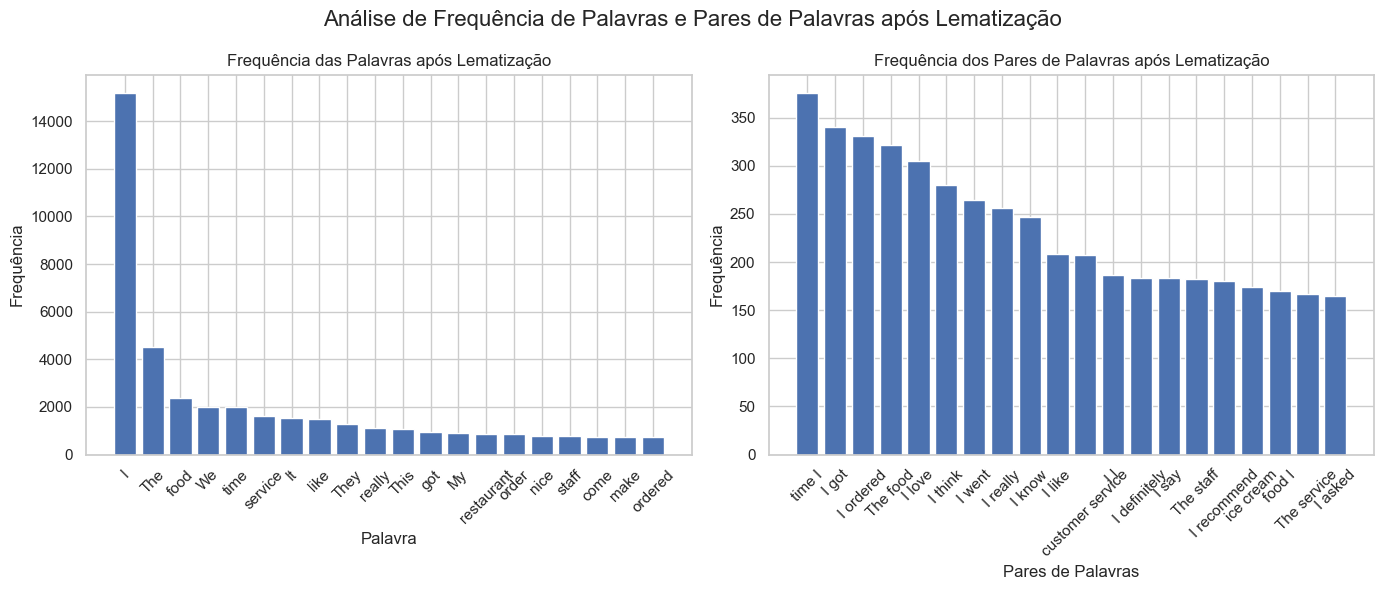

In [415]:
# Crie uma figura geral para os gráficos
plt.figure(figsize=(14, 6))

# Gráfico de barras para a frequência de palavras
plt.subplot(121)
plt.bar(dist['Word'], dist['Frequency'])
plt.title('Frequência das Palavras após Lematização')
plt.xlabel('Palavra')
plt.ylabel('Frequência')
plt.xticks(rotation=45)

# Gráfico de barras para a frequência de pares de palavras
plt.subplot(122)
plt.bar(dist_pair['Words'].apply(lambda x: f"{x[0]} {x[1]}"), dist_pair['Frequency'])
plt.title('Frequência dos Pares de Palavras após Lematização')
plt.xlabel('Pares de Palavras')
plt.ylabel('Frequência')
plt.xticks(rotation=45)

# Título geral acima dos gráficos
plt.suptitle('Análise de Frequência de Palavras e Pares de Palavras após Lematização', fontsize=16)

# Ajuste o layout para evitar sobreposição
plt.tight_layout()

# Exibir os gráficos
plt.show()

### 3.3.2 N-grams 

In [86]:
# Convert the set of stop words into a list
my_stop_words_list = list(my_stop_words)

# Create the vectorizer with the stop words as a list for bigrams
vect_bigrams = CountVectorizer(stop_words=my_stop_words_list, ngram_range=(2, 2))
bigrams = vect_bigrams.fit_transform(reviews['text'])
feature_names_bigrams = vect_bigrams.get_feature_names_out()
bigram_df = pd.DataFrame(bigrams.toarray(), columns=feature_names_bigrams)

# Create the vectorizer with the stop words as a list for trigrams
vect_trigrams = CountVectorizer(stop_words=my_stop_words_list, ngram_range=(3, 3))
trigrams = vect_trigrams.fit_transform(reviews['text'])
feature_names_trigrams = vect_trigrams.get_feature_names_out()
trigram_df = pd.DataFrame(trigrams.toarray(), columns=feature_names_trigrams)

# Calculate the total frequency of each bigram
bigram_frequency = pd.DataFrame(bigram_df.sum(axis=0)).reset_index()
bigram_frequency.columns = ['bigram', 'frequency']

# Calculate the total frequency of each trigram
trigram_frequency = pd.DataFrame(trigram_df.sum(axis=0)).reset_index()
trigram_frequency.columns = ['trigram', 'frequency']

# Sort the bigrams and trigrams by frequency in descending order and take the first 20
bigram_frequency = bigram_frequency.sort_values(by='frequency', ascending=False).head(20)
trigram_frequency = trigram_frequency.sort_values(by='frequency', ascending=False).head(20)

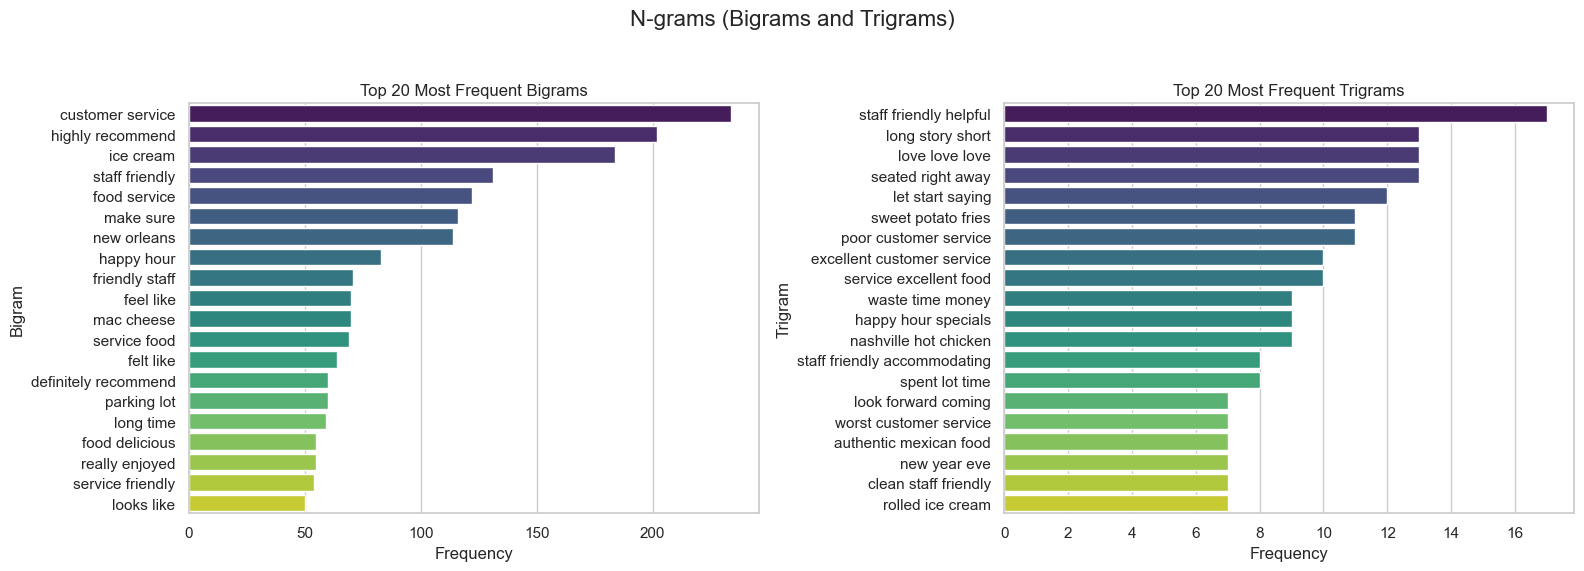

In [87]:
# Set the plot style (optional)
sns.set(style="whitegrid")

# Create subplots for bigrams and trigrams
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot the bigrams
sns.barplot(x='frequency', y='bigram', data=bigram_frequency, palette='viridis', ax=axes[0])
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Bigram')
axes[0].set_title('Top 20 Most Frequent Bigrams')

# Plot the trigrams
sns.barplot(x='frequency', y='trigram', data=trigram_frequency, palette='viridis', ax=axes[1])
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Trigram')
axes[1].set_title('Top 20 Most Frequent Trigrams')

# Add a general title
fig.suptitle('N-grams (Bigrams and Trigrams)', fontsize=16)

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the top margin for the title
plt.show()

### 3.3.3 Word2Vec for vectorization

In [88]:
df_good = reviews[reviews['stars'] > 3].copy()
good_reviews = ' '.join(df_good.text)
# split the long string into sentences
sentences_good = sent_tokenize(good_reviews)
good_token_clean = list()
# get tokens for each sentence
for sentence in sentences_good:
    eng_word = re.findall(r'[A-Za-z\-]+', sentence)
    good_token_clean.append([i.lower() for i in eng_word if i.lower() not in my_stop_words])

In [89]:
good_token_clean

[['needed',
  'new',
  'tires',
  'wife',
  'car',
  'special',
  'order',
  'day',
  'dropped',
  'morning',
  'work',
  'called',
  'hours',
  'later',
  'car',
  'ready',
  'quick',
  'efficient',
  'woman',
  'helped',
  'awesome',
  'jim',
  'woltman',
  'works',
  'goleta',
  'honda',
  'stars',
  'knowledgeable',
  'helpful',
  'personable',
  'fantastic',
  'job',
  'honda',
  'thank',
  'jim',
  'thank',
  'honda',
  'fabulous',
  'employee',
  'times',
  'shrimp',
  'got',
  'nice',
  'selection',
  'different',
  'fish',
  'prices',
  'decent',
  'seafood',
  'market',
  'area',
  'fantastic',
  'eat',
  'hungry',
  'need',
  'snack',
  'price',
  'friendly',
  'staff',
  'clean',
  'pleasant',
  'visit',
  'friends',
  'walked',
  'door',
  'greeted',
  'welcoming',
  'smile',
  'offered',
  'help',
  'finding',
  'match',
  'home',
  'told',
  'like',
  'return',
  'money',
  'problem',
  'nice',
  'experience',
  'fair',
  'pricing',
  'beats',
  'pizza',
  'beer',
  'boo

In [90]:
model_ted = Word2Vec(sentences=good_token_clean, vector_size=500, window=10, min_count=1, workers=4, sg=0)
model_ted.predict_output_word(['service'], topn=10)

[('lakeview', 7.3341835e-05),
 ('kee', 7.334171e-05),
 ('hardware', 7.334165e-05),
 ('hygge', 7.3341645e-05),
 ('comment', 7.334159e-05),
 ('settings', 7.334153e-05),
 ('celebrate', 7.334151e-05),
 ('starved', 7.334146e-05),
 ('mollie', 7.3341456e-05),
 ('yam', 7.3341456e-05)]

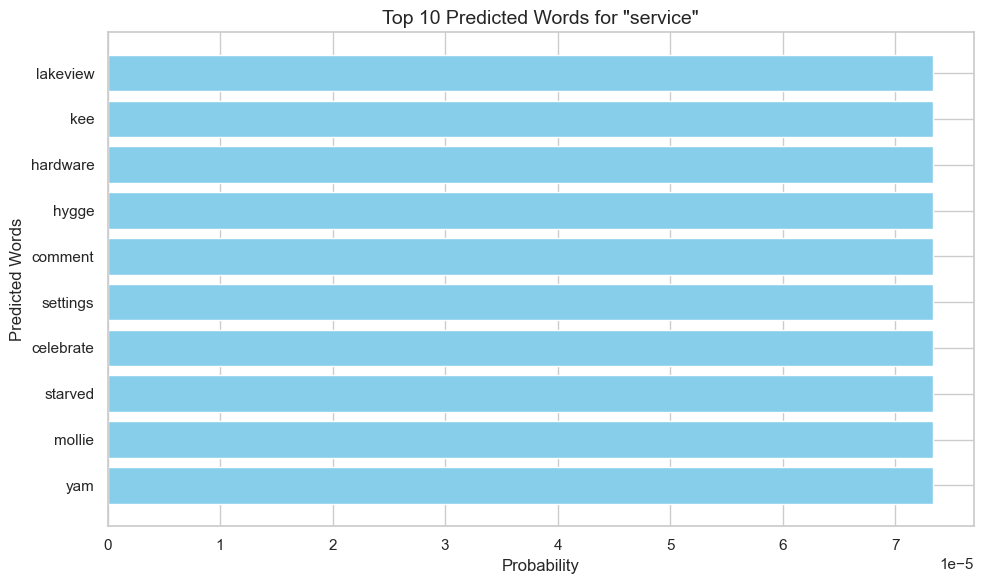

In [91]:
# Replace 'service' with the word you want to predict
target_word = 'service'

# Use the Word2Vec model to predict the top 10 words for the target word
predictions = model_ted.predict_output_word([target_word], topn=10)

# Extract the predicted words and their probabilities
predicted_words = [word for word, _ in predictions]
probabilities = [probability for _, probability in predictions]

# Create a bar chart to visualize the predictions
plt.figure(figsize=(10, 6))
plt.barh(predicted_words, probabilities, color='skyblue')
plt.xlabel('Probability', fontsize=12)
plt.ylabel('Predicted Words', fontsize=12)
plt.title(f'Top 10 Predicted Words for "{target_word}"', fontsize=14)
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.tight_layout()

# Show the plot
plt.show()

### 3.3.4 Spacy

In [92]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Assuming 'full_text' contains your text data
doc = nlp(full_text[:1000])

# Initialize a list to store tokens
tokens = []

# Iterate through the spaCy doc
for token in doc:
    # Check if the token is a valid word (alpha) and not in your stop words
    if token.is_alpha and token.text not in my_stop_words:
        tokens.append(token.text)
        print(token.text, token.lemma_)

# Calculate the frequency distribution of tokens
token_dist = FreqDist(tokens)
dist = pd.DataFrame(token_dist.most_common(20), columns=['Word', 'Frequency'])

went go
lunch lunch
burger burger
meh meh
obvious obvious
focus focus
burgers burger
different different
random random
crap crap
pile pile
flavor flavor
meat meat
burger burger
patty patty
steamed steamed
appeared appear
preformed preform
patty patty
contrary contrary
stated state
menu menu
ground ground
beef beef
kroger kroger
make make
burger burger
blows blow
water water
needed need
new new
tires tire
wife wife
car car
special special
order order
day day
dropped drop
morning morning
work work
called call
hours hour
later later
car car
ready ready
quick quick
efficient efficient
woman woman
helped help
awesome awesome
jim jim
woltman woltman
works work
goleta goleta
honda honda
stars star
knowledgeable knowledgeable
helpful helpful
personable personable
fantastic fantastic
job job
honda honda
thank thank
jim jim
thank thank
honda honda
fabulous fabulous
employee employee
times time
shrimp shrimp
got get
nice nice
selection selection
different different
fish fish
prices price
decent d

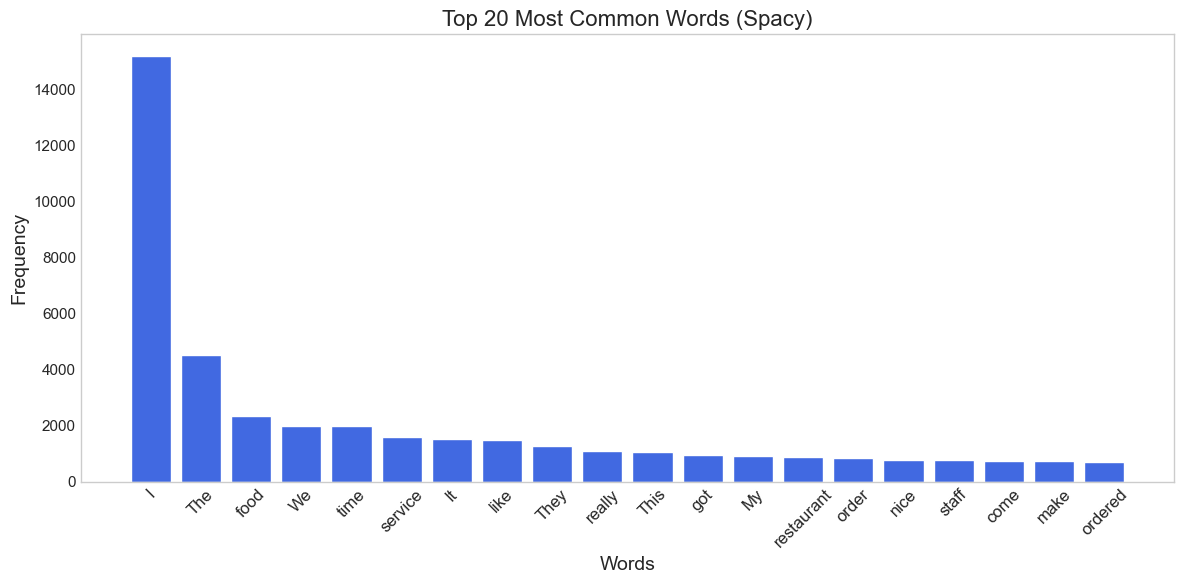

In [429]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create a bar chart with a white background
ax.bar(dist['Word'], dist['Frequency'], color='#4169E1')

# Set the background color to white
ax.set_facecolor('white')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, fontsize=12)

# Add labels and title
ax.set_xlabel('Words', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Top 20 Most Common Words (Spacy)', fontsize=16)

# Remove the gray gridlines
ax.grid(False)

# Display the graph
plt.tight_layout()
plt.show()

### 3.3.5 Making use of regular expressions

In [94]:
# Define your pattern for tokenization
pattern = r'''(?x)           # set flag to allow verbose regexps
        (?:[A-Z]\.)+         # abbreviations, e.g. U.S.A.
        | \w+(?:-\w+)*       # words with optional internal hyphens
        | \$?\d+(?:\.\d+)?%? # currency and percentages, e.g. $12.40, 82%
        | \.\.\.             # ellipsis
        | [][.,;"'?():-_`]   # these are separate tokens; includes ], [
        '''

# Tokenize the text using the specified pattern
tokens = regexp_tokenize(full_text, pattern)

# Filter and clean the tokens (remove non-alphanumeric and stopwords)
filtered_tokens = [token.lower() for token in tokens if token.isalpha() and token.lower() not in my_stop_words]

# Calculate the frequency distribution of tokens
token_dist = FreqDist(filtered_tokens)

# Create a DataFrame with the top 20 most common words and their frequencies
dist = pd.DataFrame(token_dist.most_common(20), columns=['Word', 'Frequency'])

# Print the DataFrame or perform further analysis
print(dist)

          Word  Frequency
0         food       2555
1      service       1787
2         time       1564
3         like       1534
4       really       1180
5          got        992
6         best        854
7         nice        850
8        staff        839
9      ordered        792
10       order        778
11    friendly        758
12  restaurant        729
13        love        725
14   delicious        717
15        went        705
16         try        690
17      people        679
18        came        669
19     amazing        664


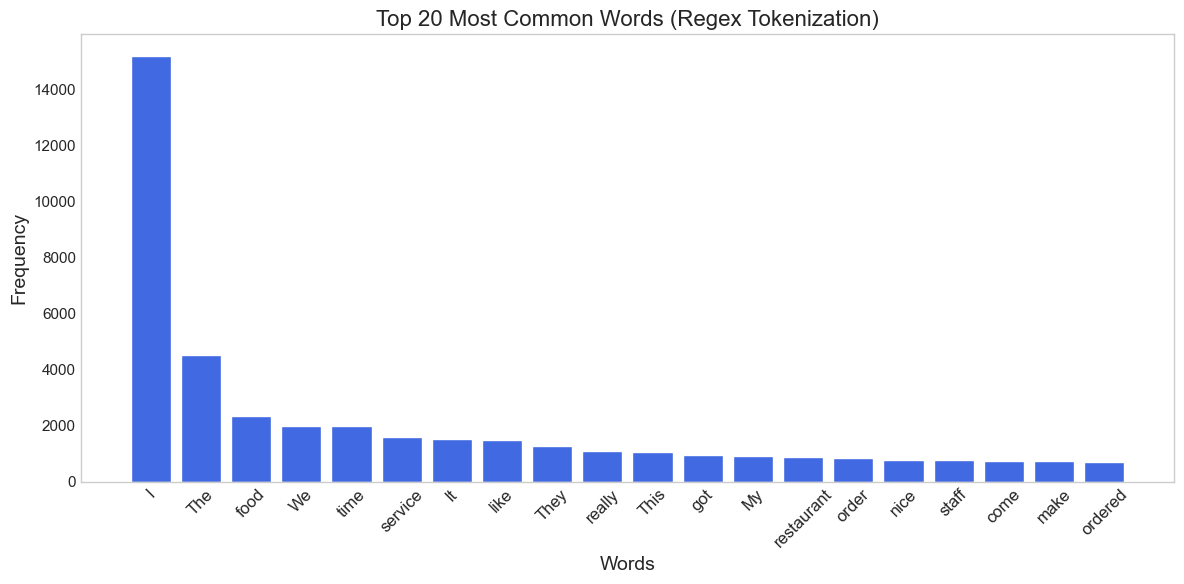

In [461]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create a bar chart with a white background
ax.bar(dist['Word'], dist['Frequency'], color='#4169E1')

# Set the background color to white
ax.set_facecolor('white')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, fontsize=12)

# Add labels and title
ax.set_xlabel('Words', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Top 20 Most Common Words (Regex Tokenization)', fontsize=16)

# Remove the gray gridlines
ax.grid(False)

# Display the graph
plt.tight_layout()
plt.show()

### 3.3.6 Dealing with multi-word expressions (MWE)

In [96]:
# Suppose 'full_text' contains your text data
doc = nlp(full_text[:1000]) # Process the first 1000 characters of the text

# Initialize an MWETokenizer
mwe_tokenizer = MWETokenizer()

# Initialize lists to store sentences and tokens
sentences = []
tokens = []

# Iterate through the sentences in the spaCy document
for sent in doc.sents:
    sentence_text = sent.text
    sentences.append(sentence_text)
    
    # Tokenize the sentence using MWETokenizer
    sentence_tokens = mwe_tokenizer.tokenize(sentence_text.split())
    
    # Filter and clean tokens (remove non-alphanumerics and stopwords)
    filtered_sentence_tokens = [token.lower() for token in sentence_tokens if token.lower() not in my_stop_words]
    
    # Add filtered tokens to the token list
    tokens.extend(filtered_sentence_tokens)

# Calculate the frequency distribution of the tokens
token_dist = FreqDist(tokens)

# Create a DataFrame with the 20 most common words and their frequencies
dist = pd.DataFrame(token_dist.most_common(20), columns=['Word', 'Frequency'])

# Print the DataFrame or perform additional analysis
print(dist)

         Word  Frequency
0      burger          3
1       honda          3
2   different          2
3       patty          2
4         car          2
5         jim          2
6       thank          2
7        went          1
8       lunch          1
9         meh          1
10    obvious          1
11      focus          1
12    burgers          1
13     random          1
14       crap          1
15       pile          1
16     flavor          1
17       meat          1
18    steamed          1
19   appeared          1


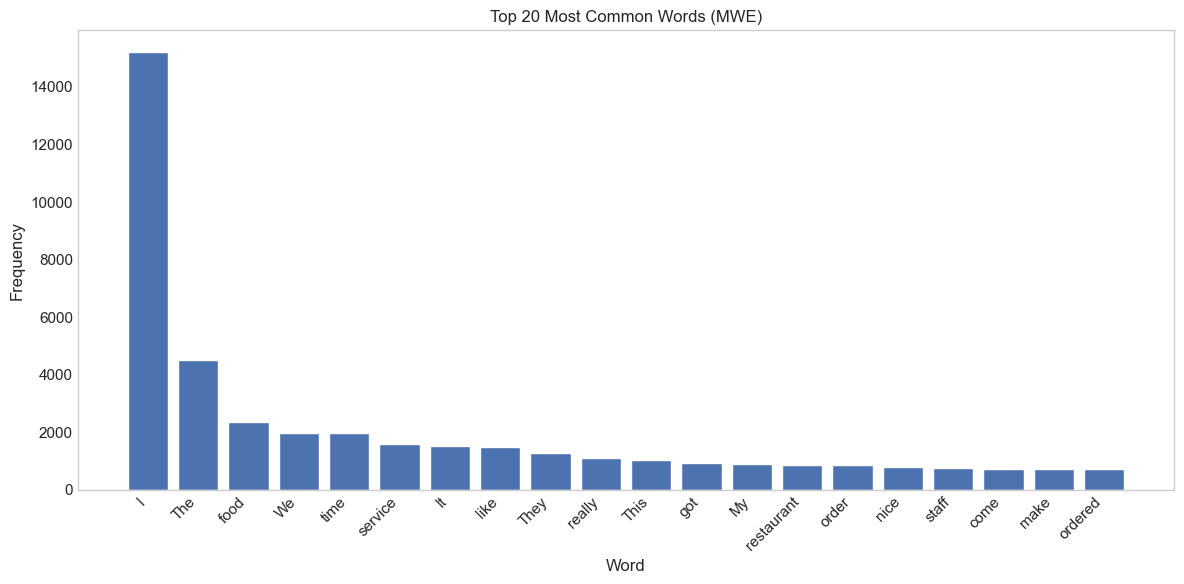

In [465]:
# Criar um gráfico de barras com fundo branco e sem grades
plt.figure(figsize=(12, 6))
plt.gca().set_facecolor('white')  # Define o fundo do gráfico como branco
plt.grid(False)  # Remove as grades
plt.bar(dist['Word'], dist['Frequency'])
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words (MWE)')
plt.xticks(rotation=45, ha='right')  # Rotacionar rótulos do eixo x para melhor legibilidade
plt.tight_layout()

# Exibir o gráfico
plt.show()

# 4. Sentiment Analysis

## 4.1 Lexicon-based Tool — VADER

In [462]:
# Download the VADER lexicon
nltk.download('vader_lexicon')

n_samples = 100
reviews_vader = reviews.sample(n=n_samples, random_state=42)

# COnvert the column 'date' to datetime
reviews_vader['date'] = pd.to_datetime(reviews_vader['date'])
# Create 'target' column based on the specified conditions
reviews_vader['target'] = reviews_vader['stars'].apply(lambda rating: 1 if rating > 3 else (-1 if rating < 3 else 0))

# Instantiate new SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Generate sentiment scores
sentiment_scores = reviews_vader['text'].apply(sid.polarity_scores)
sentiment = sentiment_scores.apply(lambda x: x['compound'])

# Definir a coluna 'date' como índice
sentiment.index = reviews_vader['date']

# Agora você pode usar resample para calcular a média mensal
monthly_sentiment = sentiment.resample('M').mean()

# Now, add your code for evaluating sentiment analysis performance
y_pred = []
y = reviews_vader['target']
for rev in reviews_vader['text']:
    y_pred.append(1 if sid.polarity_scores(rev)['compound'] > 0 else 0)

#Save VADER reults
VADER_accuracy = accuracy_score(y, y_pred)
VADER_precision = precision_score(y, y_pred, average='weighted')
VADER_recall = recall_score(y, y_pred, average='weighted')
VADER_f1 = f1_score(y, y_pred, average='weighted')

print('Accuracy: ', VADER_accuracy)
print('Precision: ', VADER_precision)
print('Recall: ', VADER_recall)
print('F1: ', VADER_f1)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pport\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Accuracy:  0.67
Precision:  0.521685393258427
Recall:  0.67
F1:  0.5864556962025317


c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


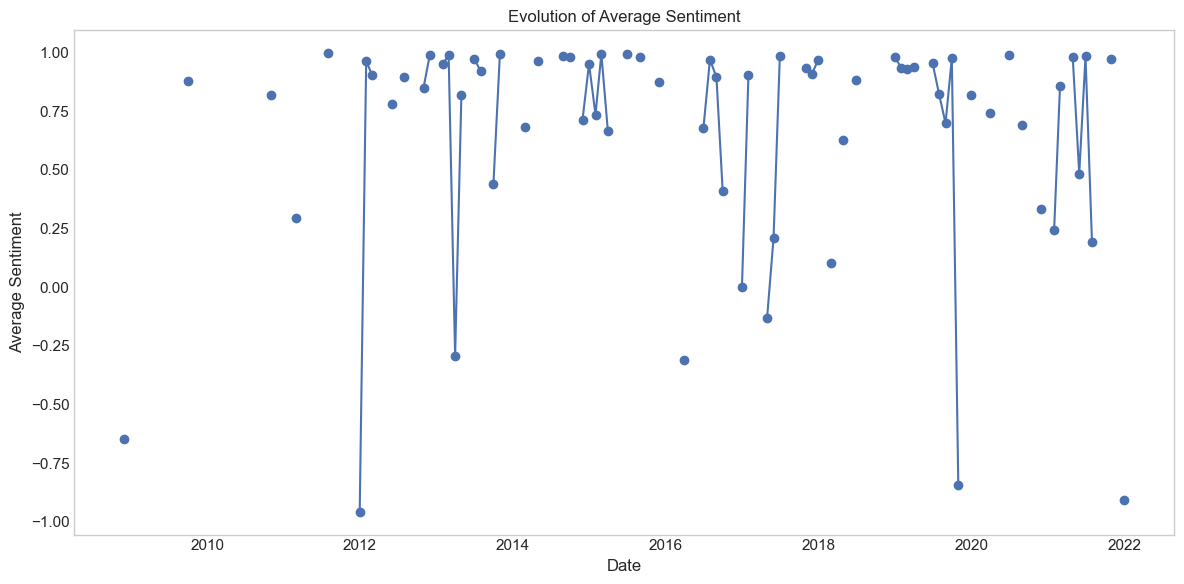

In [464]:
# Plot the monthly sentiment scores
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(monthly_sentiment.index, monthly_sentiment.values, marker='o', linestyle='-')
ax.set_title('Evolution of Average Sentiment')  
ax.set_xlabel('Date')  
ax.set_ylabel('Average Sentiment')  
ax.grid(False)

# Format the x-axis to show only the years
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%Y"))

# Set the background color to white
ax.set_facecolor('white')

# Show the graph
plt.tight_layout()
plt.show()

## 4.2 Supervised Learning Classifiers

In [108]:
df

review_id                 user_id  \
date                                                                  
2018-04-04 21:09:53  J5Q1gH4ACCj6CtQG7Yom7g  56gL9KEJNHiSDUoyjk2o3Q   
2020-05-24 12:22:14  HlXP79ecTquSVXmjM10QxQ  bAt9OUFX9ZRgGLCXG22UmA   
2019-02-14 03:47:48  JBBULrjyGx6vHto2osk_CQ  NRHPcLq2vGWqgqwVugSgnQ   
2013-04-27 01:55:49  U9-43s8YUl6GWBFCpxUGEw  PAxc0qpqt5c2kA0rjDFFAg   
2019-05-15 18:29:25  8T8EGa_4Cj12M6w8vRgUsQ  BqPR1Dp5Rb_QYs9_fz9RiA   
...                                     ...                     ...   
2013-04-09 22:29:48  bXXRzBg7DuGnY8ij4INBWg  9fP3KiiVpFVYcnqgD3aZJw   
2018-09-27 23:47:13  FkekUQC8z63ywSFQnK4Z4w  JLW2uULP_Q1KXHhToNljcQ   
2018-09-05 23:00:37  4IzbwfjgwUq1gXKA97Erwg  lESGYBwhs9ZtpWeJf_2Zig   
2014-02-13 22:54:43  23xRe5HtAsPlHyUuM7AFTQ  5pgl40PSrB-dTbEg-eWIFA   
2015-05-08 02:42:30  vLxH2ifmZw8htzm_WZCGVw  W0DJOPsSwcAj0uqCJG8iLw   

                                business_id  stars  useful  funny  cool  \
date                                                                      
2018-04-04 21:09:53  8yR12PNSMo6FBYx1u5KPlw      2       1      0     0   
2020-05-24 12:22:14  pBNucviUkNsiqhJv5IFpjg      5       0      0     0   
2019-02-14 03:47:48  8sf9kv6O4GgEb0j1o22N1g      5       0      0     0   
2013-04-27 01:55:49  XwepyB7KjJ-XGJf0vKc6Vg      4       0      0     0   
2019-05-15 18:29:25  prm5wvpp0OHJBlrvTj9uOg      5       0      0     0   
...                                     ...    ...     ...    ...   ...   
2013-04-09 22:29:48  iaBU5h_j0TCrUFzTbjFIlw      3       9      0     0   
2018-09-27 23:47:13  jMStvE-tQzSpRCAO0nAE6g      3       5      2     8   
2018-09-05 23:00:37  hGCETx03FN8Qtx1T8StHaQ      5       0      0     0   
2014-02-13 22:54:43  ecapYwbEvmKHKAfsGA4tow      4       3      0     0   
2015-05-08 02:42:30  aGOXuqO6yhN66tLYI61Thg      2       1      0     0   

                                                                  text  
date                                                                    
2018-04-04 21:09:53  Went for lunch and found that my burger was me...  
2020-05-24 12:22:14  I needed a new tires for my wife's car. They h...  
2019-02-14 03:47:48  Jim Woltman who works at Goleta Honda is 5 sta...  
2013-04-27 01:55:49  Been here a few times to get some shrimp.  The...  
2019-05-15 18:29:25  This is one fantastic place to eat whether you...  
...                                                                ...  
2013-04-09 22:29:48  I am not sure what to think of this place. I b...  
2018-09-27 23:47:13  I'm so excited to see the red Robin had re-ope...  
2018-09-05 23:00:37  This is our go-to pizza place!  We love their ...  
2014-02-13 22:54:43  This is located in a great spot fairly close t...  
2015-05-08 02:42:30  I went in for a sirloin burger and a salad. Th...  

[5000 rows x 8 columns]

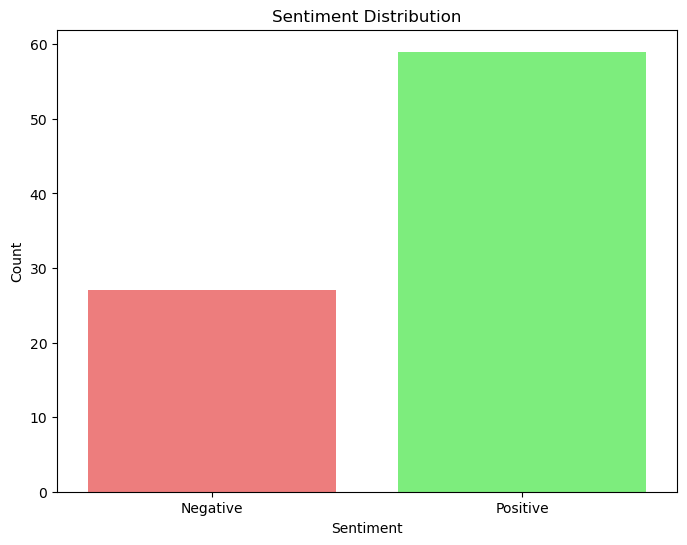

In [9]:
n_samples = 100
df = reviews.sample(n=n_samples, random_state=42)
df = df[df['stars'] != 3]
df['sentiment'] = df['stars'].apply(lambda rating : +1 if rating > 3 else -1)

# Count the number of samples for each sentiment class
sentiment_counts = df['sentiment'].value_counts()

# Define custom colors
colors = ['#FF6B6B', '#6BFF6B']

# Create a bar chart with custom colors and labels
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=colors)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

### 4.2.1 CountVectorizer 

In [10]:
# vectorization
vect = CountVectorizer(max_features=300, stop_words='english')
vect.fit(df.text)
X = vect.transform(df.text)
X_df = pd.DataFrame(X.toarray(), columns=vect.get_feature_names_out())
# Define the vector of targets and matrix of features
y = df.sentiment
X = X_df
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

y.value_counts()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60, 300), (26, 300), (60,), (26,))

#### 4.2.1.1 Logistic Regression

In [11]:
# Create and fit the logistic regression model
logreg = LogisticRegression(solver='lbfgs', multi_class='auto', random_state=1)
logreg.fit(X_train, y_train)  # Usando X_train e y_train do seu código anterior

# Predicting the test set results
y_pred_logreg = logreg.predict(X_test)  # Usando X_test do seu código anterior

# Training score
train_score_CV = logreg.score(X_train, y_train) #Use for results
test_score_CV = logreg.score(X_test, y_test)

print(f"Score on training set: {train_score_CV}")
print(f"Score on test set: {test_score_CV}")

Score on training set: 1.0
Score on test set: 0.8076923076923077


In [12]:
print('The Confusion Matrix for Logistic Regression')
con_mat_lr_CV = confusion_matrix(y_test, y_pred_logreg)
df_cm_lr_CV = pd.DataFrame(con_mat_lr_CV, columns = ['Predicted 0','Predicted 1'], index = ['True 0','True 1'])
display(df_cm_lr_CV)
print('The Classification report for Logistic Regression')
report = classification_report(y_test, y_pred_logreg, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

The Confusion Matrix for Logistic Regression


Predicted 0  Predicted 1
True 0            4            4
True 1            1           17

The Classification report for Logistic Regression


precision    recall  f1-score    support
-1             0.800000  0.500000  0.615385   8.000000
1              0.809524  0.944444  0.871795  18.000000
accuracy       0.807692  0.807692  0.807692   0.807692
macro avg      0.804762  0.722222  0.743590  26.000000
weighted avg   0.806593  0.807692  0.792899  26.000000

In [13]:
estimators = [('classifier',LogisticRegression(solver='lbfgs',multi_class='auto',random_state=1))]
pipe = Pipeline(estimators)

params = {'classifier__C' : [10**j for j in range(-4,4)]}
grid_search = GridSearchCV(pipe, param_grid=params,cv=5)

fitted_search = grid_search.fit(X_train, y_train)

fitted_search.best_estimator_

Pipeline(steps=[('classifier', LogisticRegression(C=0.1, random_state=1))])

In [14]:
logreg = LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=1,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False)
logreg.fit(X_train, y_train)

# Predicting the test set results
y_pred_logreg = logreg.predict(X_test)

# Training score
print(f"Score on training set: {logreg.score(X_train,y_train)}")
print(f"Score on test set: {logreg.score(X_test,y_test)}")

# Criação da matriz de confusão / DataFrame
print('The Confusion Matrix for Logistic Regression')
con_mat_lr_final_CV = confusion_matrix(y_test, y_pred_logreg)
df_cm_lr_final_CV = pd.DataFrame(con_mat_lr_final_CV, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_lr_final_CV)

# Criação do relatório de classificação
print('The Classification Report  for Logistic Regression')
report_lr_final_CV = classification_report(y_test, y_pred_logreg, output_dict=True)
df_report_lr_final_CV = pd.DataFrame(report_lr_final_CV).transpose()
df_First_Approach_Logistic_Regression_Pipeline = df_report_lr_final_CV
display(df_report_lr_final_CV)

Score on training set: 1.0
Score on test set: 0.8076923076923077
The Confusion Matrix for Logistic Regression


Predicted 0  Predicted 1
True 0            5            3
True 1            2           16

The Classification Report  for Logistic Regression


precision    recall  f1-score    support
-1             0.714286  0.625000  0.666667   8.000000
1              0.842105  0.888889  0.864865  18.000000
accuracy       0.807692  0.807692  0.807692   0.807692
macro avg      0.778195  0.756944  0.765766  26.000000
weighted avg   0.802776  0.807692  0.803881  26.000000

#### 4.2.1.2 Random Forest

In [16]:
my_random_forest_CV = RandomForestClassifier(random_state=1)
my_random_forest_CV.fit(X_train,y_train)
print(f"Random Forest: {my_random_forest_CV.score(X_train,y_train)}")
print(f"Random Forest: {my_random_forest_CV.score(X_test, y_test)}")

Random Forest: 1.0
Random Forest: 0.7307692307692307


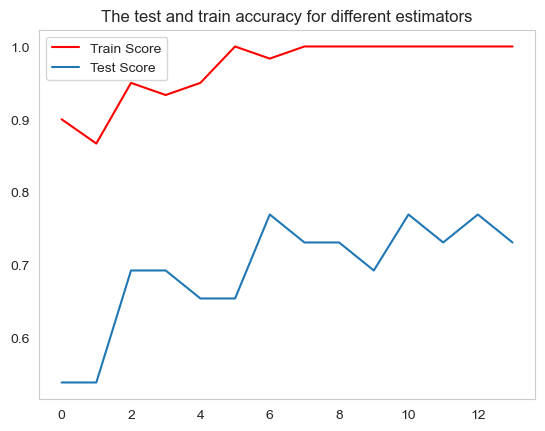

7


In [17]:
dt_train = []
dt_test = []
depth = []

for i in range(1, 15):
    my_random_forest = RandomForestClassifier(n_estimators=i, random_state=1)
    my_random_forest.fit(X_train, y_train)
    dt_train.append(my_random_forest.score(X_train, y_train))
    dt_test.append(my_random_forest.score(X_test, y_test))
    depth.append(i)

# Setting the seaborn style to set the background to white
sns.set_style("whitegrid")

plt.figure()
plt.title('The test and train accuracy for different estimators')

# Create the line graph for the training and test
plt.plot(dt_train, color='red', label='Train Score')
plt.plot(dt_test, label='Test Score')

# Remove the grids
plt.grid(False)

plt.legend()
plt.show()

print(depth[np.argmax(dt_test)])

##### 4.2.1.2.1 Now we found the optimal n_estimators as 12, the both train and test accuracy are increased.

In [18]:
# Predicting the test set results
y_pred_rand = my_random_forest.predict(X_test)

In [19]:
# Criação da matriz de confusão / DataFrame
print('The Confusion Matrix for Random Forest')
con_mat_lr = confusion_matrix(y_test, y_pred_rand)
df_cm_lr = pd.DataFrame(con_mat_lr, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_lr)

# Criação do relatório de classificação
print('The Classification Report for Random Forest')
report_lr = classification_report(y_test, y_pred_rand, output_dict=True)
df_report_lr = pd.DataFrame(report_lr).transpose()
df_First_Approach_Random_Forest_Pipeline = df_report_lr
display(df_report_lr)

The Confusion Matrix for Random Forest


Predicted 0  Predicted 1
True 0            3            5
True 1            2           16

The Classification Report for Random Forest


precision    recall  f1-score    support
-1             0.600000  0.375000  0.461538   8.000000
1              0.761905  0.888889  0.820513  18.000000
accuracy       0.730769  0.730769  0.730769   0.730769
macro avg      0.680952  0.631944  0.641026  26.000000
weighted avg   0.712088  0.730769  0.710059  26.000000

#### 4.2.1.3 XGBoost

In [134]:
y_train_mapped = y_train.map({-1: 0, 1: 1})
y_test_mapped = y_test.map({-1: 0, 1: 1})
XGB_model_CV = xgb.XGBClassifier(
    n_estimators=100,  # Número de árvores (ou estimadores) no modelo
    learning_rate=0.1,  # Taxa de aprendizado
    max_depth=3,  # Profundidade máxima da árvore
    random_state=42  # Semente para reproduzibilidade
)
XGB_model_CV.fit(X_train, y_train_mapped)

print(f"XG Boost train score: {XGB_model_CV.score(X_train, y_train_mapped)}")
print(f"XG Boost test score: {XGB_model_CV.score(X_test, y_test_mapped)}")

XG Boost train score: 0.9166666666666666
XG Boost test score: 0.8076923076923077


In [136]:
# Generate and display the confusion matrix
print('The Confusion Matrix for XGBoost')
con_mat_xgb_CV = confusion_matrix(y_test_mapped, XGB_model_CV.predict(X_test))
df_cm_xgb_CV = pd.DataFrame(con_mat_xgb_CV, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_xgb_CV)

# Generate and display the classification report
print('The Classification report for XGBoost')
report_xgb_CV = classification_report(y_test_mapped, XGB_model_CV.predict(X_test), output_dict=True)
df_report_xgb_CV = pd.DataFrame(report_xgb_CV).transpose()
display(df_report_xgb_CV)

The Confusion Matrix for XGBoost


Predicted 0  Predicted 1
True 0            3            5
True 1            0           18

The Classification report for XGBoost


precision    recall  f1-score    support
0              1.000000  0.375000  0.545455   8.000000
1              0.782609  1.000000  0.878049  18.000000
accuracy       0.807692  0.807692  0.807692   0.807692
macro avg      0.891304  0.687500  0.711752  26.000000
weighted avg   0.849498  0.807692  0.775712  26.000000

In [137]:
# Define the pipeline with an XGBoost classifier
estimators = [('classifier', xgb.XGBClassifier(random_state=1))]
pipe = Pipeline(estimators)

# Define the parameter grid for grid search
params = {
    'classifier__n_estimators': [100, 300, 500],
    'classifier__max_depth': [3, 4, 5],
    'classifier__learning_rate': [0.1, 0.01, 0.001]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search to the training data
fitted_search = grid_search.fit(X_train, y_train_mapped)

# Get the best estimator with optimal hyperparameters
best_estimator = fitted_search.best_estimator_

# Print the best estimator
print("Best Estimator:", best_estimator)


Best Estimator: Pipeline(steps=[('classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.01, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=4, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=1, reg_alpha=0,
                               reg_lambda=1, ...

In [139]:
# Create the XGBoost model with the specified hyperparameters
XGB_model_CV = xgb.XGBClassifier(random_state=1)

# Fit the model to the training data
XGB_model_CV.fit(X_train, y_train_mapped)

# Predicting the test set results
y_pred_XGB_CV = XGB_model_CV.predict(X_test)

# Training score
train_score = XGB_model_CV.score(X_train, y_train_mapped)
test_score = XGB_model_CV.score(X_test, y_test_mapped)

print(f"Score on training set: {train_score}")
print(f"Score on test set: {test_score}")

# Generate and display the confusion matrix
print('The Confusion Matrix for XGBoost')
con_mat_XGB_CV = confusion_matrix(y_test_mapped, y_pred_XGB_CV)
con_mat_XGB_CV = pd.DataFrame(con_mat_XGB_CV, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
con_mat_XGB_CV

# Generate and display the classification report
print('The Classification report for XGBoost')
report_xgb_CV = classification_report(y_test_mapped, XGB_model_CV.predict(X_test), output_dict=True)
df_report_xgb_CV = pd.DataFrame(report_xgb_CV).transpose()
df_First_Approach_XGBoost_Pipeline = df_report_xgb_CV
display(df_report_xgb_CV)

Score on training set: 0.95
Score on test set: 0.8846153846153846
The Confusion Matrix for XGBoost
The Classification report for XGBoost


precision    recall  f1-score    support
0              1.000000  0.625000  0.769231   8.000000
1              0.857143  1.000000  0.923077  18.000000
accuracy       0.884615  0.884615  0.884615   0.884615
macro avg      0.928571  0.812500  0.846154  26.000000
weighted avg   0.901099  0.884615  0.875740  26.000000

#### 4.2.1.4 Naive Bayes

In [140]:
# Create and fit the Naive Bayes model
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train) # Using X_train and y_train from your previous code

# Predicting the results of the test set
y_pred_nb = naive_bayes.predict(X_test) # Using X_test from your previous code

# Training score
train_score_NB = naive_bayes.score(X_train, y_train)
test_score_NB = naive_bayes.score(X_test, y_test)

print(f"Score on training set: {train_score_NB}")
print(f"Score on test set: {test_score_NB}")

Score on training set: 0.9833333333333333
Score on test set: 0.8846153846153846


In [141]:
# Creation of the confusion matrix / DataFrame for the Naive Bayes model
print('The Confusion Matrix for Naive Bayes')
con_mat_nb_CV = confusion_matrix(y_test, y_pred_nb)
df_cm_nb_CV = pd.DataFrame(con_mat_nb_CV, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_nb_CV)

# Creation of the classification report for the Naive Bayes model
print('The Classification Report for Naive Bayes')
report_nb_CV = classification_report(y_test, y_pred_nb, output_dict=True)
df_report_nb_CV = pd.DataFrame(report_nb_CV).transpose()
display(df_report_nb_CV)

The Confusion Matrix for Naive Bayes


Predicted 0  Predicted 1
True 0            7            1
True 1            2           16

The Classification Report for Naive Bayes


precision    recall  f1-score    support
-1             0.777778  0.875000  0.823529   8.000000
1              0.941176  0.888889  0.914286  18.000000
accuracy       0.884615  0.884615  0.884615   0.884615
macro avg      0.859477  0.881944  0.868908  26.000000
weighted avg   0.890900  0.884615  0.886361  26.000000

In [142]:
# Create an estimator with the Naive Bayes classifier
estimators = [('classifier', MultinomialNB())]
pipe = Pipeline(estimators)

# Define the parameters for grid search
params = {'classifier__alpha': [0.001, 0.01, 0.1, 1.0]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search model to the training data
fitted_search = grid_search.fit(X_train, y_train)

# Find the best estimator (model)
best_nb_model = fitted_search.best_estimator_

In [145]:
# Create and fit the Naive Bayes model (using the best parameters from the grid search)
best_alpha = fitted_search.best_params_['classifier__alpha']
naive_bayes = MultinomialNB(alpha=best_alpha)
naive_bayes.fit(X_train, y_train)

# Predictions in the test set
y_pred_nb = naive_bayes.predict(X_test)

# Training score
train_score_NB = naive_bayes.score(X_train, y_train)
test_score_NB = naive_bayes.score(X_test, y_test)

print(f"Score on training set: {train_score_NB}")
print(f"Score on test set: {test_score_NB}")

# Creation of the confusion matrix / DataFrame
print('The Confusion Matrix for Naive Bayes')
con_mat_nb_CV = confusion_matrix(y_test, y_pred_nb)
df_cm_nb_CV = pd.DataFrame(con_mat_nb_CV, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_nb_CV)

# Creation of the classification report for Naive Bayes
print('The Classification Report for Naive Bayes')
report_nb_CV = classification_report(y_test, y_pred_nb, output_dict=True)
df_report_nb_CV = pd.DataFrame(report_nb_CV).transpose()
df_First_Approach_Naive_Bayes_Pipeline = df_report_nb_CV
display(df_report_nb_CV)

Score on training set: 1.0
Score on test set: 0.9230769230769231
The Confusion Matrix for Naive Bayes


Predicted 0  Predicted 1
True 0            7            1
True 1            1           17

The Classification Report for Naive Bayes


precision    recall  f1-score    support
-1             0.875000  0.875000  0.875000   8.000000
1              0.944444  0.944444  0.944444  18.000000
accuracy       0.923077  0.923077  0.923077   0.923077
macro avg      0.909722  0.909722  0.909722  26.000000
weighted avg   0.923077  0.923077  0.923077  26.000000

#### 4.2.1.5 Support Vector Machine

In [146]:
# Create and fit the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=1)
svm_model.fit(X_train, y_train) # Using X_train and y_train from your previous code

# Predicting the results of the test set
y_pred_svm = svm_model.predict(X_test) # Using X_test from your previous code

# Training score
train_score_svm = svm_model.score(X_train, y_train)
test_score_svm = svm_model.score(X_test, y_test)

print(f"Score on training set: {train_score_svm}")
print(f"Score on test set: {test_score_svm}")

Score on training set: 1.0
Score on test set: 0.7692307692307693


In [147]:
# Creation of the confusion matrix / DataFrame for the SVM model
print('The Confusion Matrix for SVM')
con_mat_svm_CV = confusion_matrix(y_test, y_pred_svm)
df_cm_svm_CV = pd.DataFrame(con_mat_svm_CV, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_svm_CV)

# Creation of the classification report for the SVM model
print('The Classification Report for SVM')
report_svm_CV = classification_report(y_test, y_pred_svm, output_dict=True)
df_report_svm_CV = pd.DataFrame(report_svm_CV).transpose()
display(df_report_svm_CV)

The Confusion Matrix for SVM


Predicted 0  Predicted 1
True 0            4            4
True 1            2           16

The Classification Report for SVM


precision    recall  f1-score    support
-1             0.666667  0.500000  0.571429   8.000000
1              0.800000  0.888889  0.842105  18.000000
accuracy       0.769231  0.769231  0.769231   0.769231
macro avg      0.733333  0.694444  0.706767  26.000000
weighted avg   0.758974  0.769231  0.758820  26.000000

In [148]:
# Create an estimator with the SVM classifier
estimators = [('classifier', SVC(kernel='linear', random_state=1))]
pipe = Pipeline(estimators)

# Define the parameters for grid search
params = {'classifier__C': [0.1, 1.0, 10.0], 'classifier__kernel': ['linear', 'rbf']}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search model to the training data
fitted_search = grid_search.fit(X_train, y_train)

# Find the best estimator (model)
best_svm_model = fitted_search.best_estimator_

In [150]:
# Create and fit the SVM model with the best parameters found
best_C = fitted_search.best_params_['classifier__C']
best_kernel = fitted_search.best_params_['classifier__kernel']
svm_model_CV = SVC(C=best_C, kernel=best_kernel, random_state=1)
svm_model_CV.fit(X_train, y_train)

# Predictions on the test set
y_pred_svm = svm_model_CV.predict(X_test)

# Training score
train_score_svm = svm_model_CV.score(X_train, y_train)
test_score_svm = svm_model_CV.score(X_test, y_test)

print(f"Score on training set: {train_score_svm}")
print(f"Score on test set: {test_score_svm}")

# Creation of the confusion matrix / DataFrame
print('The Confusion Matrix for SVM')
con_mat_svm_CV = confusion_matrix(y_test, y_pred_svm)
df_cm_svm_CV = pd.DataFrame(con_mat_svm_CV, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_svm_CV)

# Creation of the classification report for SVM
print('The Classification Report for SVM')
report_svm_CV = classification_report(y_test, y_pred_svm, output_dict=True)
df_report_svm_CV = pd.DataFrame(report_svm_CV).transpose()
df_First_Approach_SVM_Pipeline = df_report_svm_CV
display(df_report_svm_CV)

Score on training set: 0.9833333333333333
Score on test set: 0.8076923076923077
The Confusion Matrix for SVM


Predicted 0  Predicted 1
True 0            4            4
True 1            1           17

The Classification Report for SVM


precision    recall  f1-score    support
-1             0.800000  0.500000  0.615385   8.000000
1              0.809524  0.944444  0.871795  18.000000
accuracy       0.807692  0.807692  0.807692   0.807692
macro avg      0.804762  0.722222  0.743590  26.000000
weighted avg   0.806593  0.807692  0.792899  26.000000

### 4.2.2 TF-IDF Vectorization (Term Frequency-Inverse Document Frequency) 

In [475]:
tfidf_vect = TfidfVectorizer(max_features=300, stop_words='english')
tfidf_vect.fit(df.text)
X_tfidf = tfidf_vect.transform(df.text)

X_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out())
# Define the vector of targets and matrix of features
y = df.sentiment
X = X_df
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

y.value_counts()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((62, 300), (27, 300), (62,), (27,))

#### 4.2.2.1 Logistic Regression

In [152]:
# Create and fit the logistic regression model
logreg = LogisticRegression(solver='lbfgs', multi_class='auto', random_state=1)
logreg.fit(X_train, y_train)  # Usando X_train e y_train do seu código anterior

# Predicting the test set results
y_pred_logreg = logreg.predict(X_test)  # Usando X_test do seu código anterior

# Training score
train_score_TF_IDF = logreg.score(X_train, y_train)
test_score_TF_IDF = logreg.score(X_test, y_test)

print(f"Score on training set: {train_score_TF_IDF}")
print(f"Score on test set: {test_score_TF_IDF}")

Score on training set: 0.6833333333333333
Score on test set: 0.6923076923076923


In [153]:
print('The Confusion Matrix for Logistic Regression')
con_mat_lr_TF_IDF = confusion_matrix(y_test, y_pred_logreg)
df_cm_lr_TF_IDF = pd.DataFrame(con_mat_lr_TF_IDF, columns = ['Predicted 0','Predicted 1'], index = ['True 0','True 1'])
display(df_cm_lr_TF_IDF)
print('The Classification report for Logistic Regression')
report_TF_IDF = classification_report(y_test, y_pred_logreg, output_dict=True)
df_report_TF_IDF = pd.DataFrame(report_TF_IDF).transpose()
df_report_TF_IDF

The Confusion Matrix for Logistic Regression


Predicted 0  Predicted 1
True 0            0            8
True 1            0           18

The Classification report for Logistic Regression


c:\Users\Karim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Karim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Karim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

precision    recall  f1-score    support
-1             0.000000  0.000000  0.000000   8.000000
1              0.692308  1.000000  0.818182  18.000000
accuracy       0.692308  0.692308  0.692308   0.692308
macro avg      0.346154  0.500000  0.409091  26.000000
weighted avg   0.479290  0.692308  0.566434  26.000000

In [154]:
estimators = [('classifier',LogisticRegression(solver='lbfgs',multi_class='auto',random_state=1))]
pipe = Pipeline(estimators)

params = {'classifier__C' : [10**j for j in range(-4,4)]}
grid_search = GridSearchCV(pipe, param_grid=params,cv=5)

fitted_search = grid_search.fit(X_train, y_train)

fitted_search.best_estimator_

Pipeline(steps=[('classifier', LogisticRegression(C=1000, random_state=1))])

In [156]:
logreg = LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=1,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False)
logreg.fit(X_train, y_train)

# Predicting the test set results
y_pred_logreg = logreg.predict(X_test)

# Training score
print(f"Score on training set: {logreg.score(X_train,y_train)}")
print(f"Score on test set: {logreg.score(X_test,y_test)}")

# Criação da matriz de confusão / DataFrame
print('The Confusion Matrix for Logistic Regression')
con_mat_lr_final_TF_IDF = confusion_matrix(y_test, y_pred_logreg)
df_cm_lr_final_TF_IDF = pd.DataFrame(con_mat_lr_final_TF_IDF, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_lr_final_TF_IDF)

# Criação do relatório de classificação
print('The Classification Report  for Logistic Regression')
report_lr_final_TF_IDF = classification_report(y_test, y_pred_logreg, output_dict=True)
df_report_lr_final_TF_IDF = pd.DataFrame(report_lr_final_TF_IDF).transpose()
df_Second_Approach_Logistic_Regression_Pipeline = df_report_lr_final_TF_IDF
display(df_report_lr_final_TF_IDF)

Score on training set: 1.0
Score on test set: 0.8076923076923077
The Confusion Matrix for Logistic Regression


Predicted 0  Predicted 1
True 0            3            5
True 1            0           18

The Classification Report  for Logistic Regression


precision    recall  f1-score    support
-1             1.000000  0.375000  0.545455   8.000000
1              0.782609  1.000000  0.878049  18.000000
accuracy       0.807692  0.807692  0.807692   0.807692
macro avg      0.891304  0.687500  0.711752  26.000000
weighted avg   0.849498  0.807692  0.775712  26.000000

#### 4.2.1.2 Random Forest

In [476]:
my_random_forest_TF_IDF = RandomForestClassifier(random_state=1)
my_random_forest_TF_IDF.fit(X_train,y_train)
print(f"Random Forest: {my_random_forest_TF_IDF.score(X_train,y_train)}")
print(f"Random Forest: {my_random_forest_TF_IDF.score(X_test, y_test)}")

Random Forest: 1.0
Random Forest: 0.7777777777777778


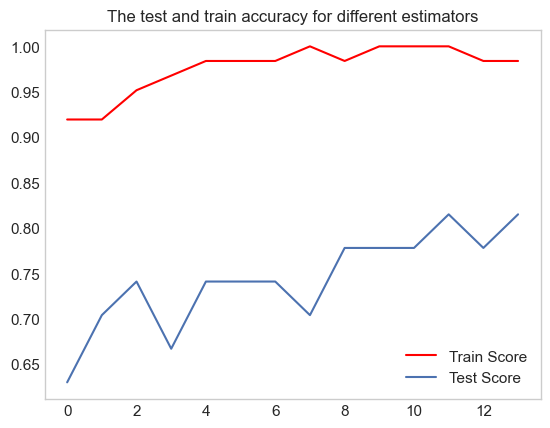

12


In [477]:
dt_train = []
dt_test = []
depth = []

for i in range(1, 15):
    my_random_forest = RandomForestClassifier(n_estimators=i, random_state=1)
    my_random_forest.fit(X_train, y_train)
    dt_train.append(my_random_forest.score(X_train, y_train))
    dt_test.append(my_random_forest.score(X_test, y_test))
    depth.append(i)

# Setting the seaborn style to set the background to white
sns.set_style("whitegrid")

plt.figure()
plt.title('The test and train accuracy for different estimators')

# Create the line graph for the training and test
plt.plot(dt_train, color='red', label='Train Score')
plt.plot(dt_test, label='Test Score')

# Remove the grids
plt.grid(False)

plt.legend()
plt.show()

print(depth[np.argmax(dt_test)])

##### 4.2.1.2.1 Now we found the optimal n_estimators as 11, the both train and test accuracy are increased.

In [159]:
# Predicting the test set results
y_pred_rand = my_random_forest.predict(X_test)

In [161]:
# Criação da matriz de confusão / DataFrame
print('The Confusion Matrix for Random Forest')
con_mat_lr_TF_IDF = confusion_matrix(y_test, y_pred_rand)
df_cm_lr_TF_IDF = pd.DataFrame(con_mat_lr, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_lr_TF_IDF)

# Criação do relatório de classificação
print('The Classification Report for Random Forest')
report_lr_TF_IDF = classification_report(y_test, y_pred_rand, output_dict=True)
df_report_lr_TF_IDF = pd.DataFrame(report_lr_TF_IDF).transpose()
df_Second_Approach_Random_Forest_Pipeline = df_report_lr_TF_IDF
display(df_report_lr_TF_IDF)

The Confusion Matrix for Random Forest


Predicted 0  Predicted 1
True 0            3            5
True 1            2           16

The Classification Report for Random Forest


precision    recall  f1-score    support
-1             0.333333  0.125000  0.181818   8.000000
1              0.695652  0.888889  0.780488  18.000000
accuracy       0.653846  0.653846  0.653846   0.653846
macro avg      0.514493  0.506944  0.481153  26.000000
weighted avg   0.584169  0.653846  0.596282  26.000000

#### 4.2.1.3 XGBoost

In [162]:
y_train_mapped = y_train.map({-1: 0, 1: 1})
y_test_mapped = y_test.map({-1: 0, 1: 1})
XGB_model_TF_IDF = xgb.XGBClassifier(
    n_estimators=100,  # Número de árvores (ou estimadores) no modelo
    learning_rate=0.1,  # Taxa de aprendizado
    max_depth=3,  # Profundidade máxima da árvore
    random_state=42  # Semente para reproduzibilidade
)
XGB_model_TF_IDF.fit(X_train, y_train_mapped)

print(f"XG Boost train score: {XGB_model_TF_IDF.score(X_train, y_train_mapped)}")
print(f"XG Boost test score: {XGB_model_TF_IDF.score(X_test, y_test_mapped)}")

XG Boost train score: 0.9333333333333333
XG Boost test score: 0.7692307692307693


In [163]:
# Generate and display the confusion matrix
print('The Confusion Matrix for XGBoost')
con_mat_xgb_TF_IDF = confusion_matrix(y_test_mapped, XGB_model_TF_IDF.predict(X_test))
df_cm_xgb_TF_IDF = pd.DataFrame(con_mat_xgb_TF_IDF, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_xgb_TF_IDF)

# Generate and display the classification report
print('The Classification report for XGBoost')
report_xgb_TF_IDF = classification_report(y_test_mapped, XGB_model_TF_IDF.predict(X_test), output_dict=True)
df_report_xgb_TF_IDF = pd.DataFrame(report_xgb_TF_IDF).transpose()
display(df_report_xgb_TF_IDF)

The Confusion Matrix for XGBoost


Predicted 0  Predicted 1
True 0            2            6
True 1            0           18

The Classification report for XGBoost


precision    recall  f1-score    support
0              1.000000  0.250000  0.400000   8.000000
1              0.750000  1.000000  0.857143  18.000000
accuracy       0.769231  0.769231  0.769231   0.769231
macro avg      0.875000  0.625000  0.628571  26.000000
weighted avg   0.826923  0.769231  0.716484  26.000000

In [164]:
# Define the pipeline with an XGBoost classifier
estimators = [('classifier', xgb.XGBClassifier(random_state=1))]
pipe = Pipeline(estimators)

# Define the parameter grid for grid search
params = {
    'classifier__n_estimators': [100, 300, 500],
    'classifier__max_depth': [3, 4, 5],
    'classifier__learning_rate': [0.1, 0.01, 0.001]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search to the training data
fitted_search = grid_search.fit(X_train, y_train_mapped)

# Get the best estimator with optimal hyperparameters
best_estimator = fitted_search.best_estimator_

# Print the best estimator
print("Best Estimator:", best_estimator)


Best Estimator: Pipeline(steps=[('classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.01, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=3, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=1, reg_alpha=0,
                               reg_lambda=1, ...

In [165]:
# Create the XGBoost model with the specified hyperparameters
XGB_model_TF_IDF = xgb.XGBClassifier(random_state=1)

# Fit the model to the training data
XGB_model_TF_IDF.fit(X_train, y_train_mapped)

# Predicting the test set results
y_pred_XGB_TF_ID = XGB_model_TF_IDF.predict(X_test)

# Training score
train_score = XGB_model_TF_IDF.score(X_train, y_train_mapped)
test_score = XGB_model_TF_IDF.score(X_test, y_test_mapped)

print(f"Score on training set: {train_score}")
print(f"Score on test set: {test_score}")

# Generate and display the confusion matrix
print('The Confusion Matrix for XGBoost')
con_mat_XGB_TF_IDF = confusion_matrix(y_test_mapped, y_pred_XGB_TF_ID)
con_mat_XGB_TF_IDF = pd.DataFrame(con_mat_XGB_TF_IDF, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
con_mat_XGB_TF_IDF

# Generate and display the classification report
print('The Classification report for XGBoost')
report_xgb_TF_IDF = classification_report(y_test_mapped, XGB_model_TF_IDF.predict(X_test), output_dict=True)
df_report_xgb_TF_IDF = pd.DataFrame(report_xgb_TF_IDF).transpose()
df_Second_Approach_xgb_Pipeline = df_report_xgb_TF_IDF
display(df_report_xgb_TF_IDF)

Score on training set: 0.9833333333333333
Score on test set: 0.8076923076923077
The Confusion Matrix for XGBoost
The Classification report for XGBoost


precision    recall  f1-score    support
0              0.800000  0.500000  0.615385   8.000000
1              0.809524  0.944444  0.871795  18.000000
accuracy       0.807692  0.807692  0.807692   0.807692
macro avg      0.804762  0.722222  0.743590  26.000000
weighted avg   0.806593  0.807692  0.792899  26.000000

#### 4.2.1.4 Naive Bayes

In [166]:
# Create and fit the Naive Bayes model
naive_bayes_TF_IDF = MultinomialNB()
naive_bayes_TF_IDF.fit(X_train, y_train) # Using X_train and y_train from your previous code

# Predicting the results of the test set
y_pred_nb = naive_bayes_TF_IDF.predict(X_test) # Using X_test from your previous code

# Training score
train_score_NB = naive_bayes_TF_IDF.score(X_train, y_train)
test_score_NB = naive_bayes_TF_IDF.score(X_test, y_test)

print(f"Score on training set: {train_score_NB}")
print(f"Score on test set: {test_score_NB}")

Score on training set: 0.8666666666666667
Score on test set: 0.7307692307692307


In [167]:
# Creation of the confusion matrix / DataFrame for the Naive Bayes model
print('The Confusion Matrix for Naive Bayes')
con_mat_nb_TF_IDF = confusion_matrix(y_test, y_pred_nb)
df_cm_nb_TF_IDF = pd.DataFrame(con_mat_nb_TF_IDF, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_nb_TF_IDF)

# Creation of the classification report for the Naive Bayes model
print('The Classification Report for Naive Bayes')
report_nb_TF_IDF = classification_report(y_test, y_pred_nb, output_dict=True)
df_report_nb_TF_IDF = pd.DataFrame(report_nb_TF_IDF).transpose()
display(df_report_nb_TF_IDF)

The Confusion Matrix for Naive Bayes


Predicted 0  Predicted 1
True 0            1            7
True 1            0           18

The Classification Report for Naive Bayes


precision    recall  f1-score    support
-1             1.000000  0.125000  0.222222   8.000000
1              0.720000  1.000000  0.837209  18.000000
accuracy       0.730769  0.730769  0.730769   0.730769
macro avg      0.860000  0.562500  0.529716  26.000000
weighted avg   0.806154  0.730769  0.647983  26.000000

In [168]:
# Create an estimator with the Naive Bayes classifier
estimators = [('classifier', MultinomialNB())]
pipe = Pipeline(estimators)

# Define the parameters for grid search
params = {'classifier__alpha': [0.001, 0.01, 0.1, 1.0]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search model to the training data
fitted_search = grid_search.fit(X_train, y_train)

# Find the best estimator (model)
best_nb_model = fitted_search.best_estimator_

In [170]:
# Create and fit the Naive Bayes model (using the best parameters from the grid search)
best_alpha = fitted_search.best_params_['classifier__alpha']
naive_bayes = MultinomialNB(alpha=best_alpha)
naive_bayes.fit(X_train, y_train)

# Predictions in the test set
y_pred_nb = naive_bayes.predict(X_test)

# Training score
train_score_NB = naive_bayes.score(X_train, y_train)
test_score_NB = naive_bayes.score(X_test, y_test)

print(f"Score on training set: {train_score_NB}")
print(f"Score on test set: {test_score_NB}")

# Creation of the confusion matrix / DataFrame
print('The Confusion Matrix for Naive Bayes')
con_mat_nb_TF_IDF = confusion_matrix(y_test, y_pred_nb)
df_cm_nb_TF_IDF = pd.DataFrame(con_mat_nb_TF_IDF, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_nb_TF_IDF)

# Creation of the classification report for Naive Bayes
print('The Classification Report for Naive Bayes')
report_nb_TF_IDF = classification_report(y_test, y_pred_nb, output_dict=True)
df_report_nb_TF_IDF = pd.DataFrame(report_nb_TF_IDF).transpose()
df_Second_Approach_NB_Pipeline = df_report_nb_TF_IDF
display(df_report_nb_TF_IDF)

Score on training set: 1.0
Score on test set: 0.9230769230769231
The Confusion Matrix for Naive Bayes


Predicted 0  Predicted 1
True 0            7            1
True 1            1           17

The Classification Report for Naive Bayes


precision    recall  f1-score    support
-1             0.875000  0.875000  0.875000   8.000000
1              0.944444  0.944444  0.944444  18.000000
accuracy       0.923077  0.923077  0.923077   0.923077
macro avg      0.909722  0.909722  0.909722  26.000000
weighted avg   0.923077  0.923077  0.923077  26.000000

#### 4.2.1.5 Support Vector Machine

In [171]:
# Create and fit the SVM model
svm_model_TF_IDF = SVC(kernel='linear', C=1.0, random_state=1)
svm_model_TF_IDF.fit(X_train, y_train) # Using X_train and y_train from your previous code

# Predicting the results of the test set
y_pred_svm = svm_model_TF_IDF.predict(X_test) # Using X_test from your previous code

# Training score
train_score_svm = svm_model_TF_IDF.score(X_train, y_train)
test_score_svm = svm_model_TF_IDF.score(X_test, y_test)

print(f"Score on training set: {train_score_svm}")
print(f"Score on test set: {test_score_svm}")

Score on training set: 1.0
Score on test set: 0.7692307692307693


In [172]:
# Creation of the confusion matrix / DataFrame for the SVM model
print('The Confusion Matrix for SVM')
con_mat_svm_TF_IDF = confusion_matrix(y_test, y_pred_svm)
df_cm_svm_TF_IDF = pd.DataFrame(con_mat_svm_TF_IDF, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_svm_TF_IDF)

# Creation of the classification report for the SVM model
print('The Classification Report for SVM')
report_svm_TF_IDF = classification_report(y_test, y_pred_svm, output_dict=True)
df_report_svm_TF_IDF = pd.DataFrame(report_svm_TF_IDF).transpose()
display(df_report_svm_TF_IDF)

The Confusion Matrix for SVM


Predicted 0  Predicted 1
True 0            2            6
True 1            0           18

The Classification Report for SVM


precision    recall  f1-score    support
-1             1.000000  0.250000  0.400000   8.000000
1              0.750000  1.000000  0.857143  18.000000
accuracy       0.769231  0.769231  0.769231   0.769231
macro avg      0.875000  0.625000  0.628571  26.000000
weighted avg   0.826923  0.769231  0.716484  26.000000

In [173]:
# Create an estimator with the SVM classifier
estimators = [('classifier', SVC(kernel='linear', random_state=1))]
pipe = Pipeline(estimators)

# Define the parameters for grid search
params = {'classifier__C': [0.1, 1.0, 10.0], 'classifier__kernel': ['linear', 'rbf']}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search model to the training data
fitted_search = grid_search.fit(X_train, y_train)

# Find the best estimator (model)
best_svm_model = fitted_search.best_estimator_

In [175]:
# Create and fit the SVM model with the best parameters found
best_C = fitted_search.best_params_['classifier__C']
best_kernel = fitted_search.best_params_['classifier__kernel']
svm_model_TF_IDF = SVC(C=best_C, kernel=best_kernel, random_state=1)
svm_model_TF_IDF.fit(X_train, y_train)

# Predictions on the test set
y_pred_svm = svm_model_TF_IDF.predict(X_test)

# Training score
train_score_svm = svm_model_TF_IDF.score(X_train, y_train)
test_score_svm = svm_model_TF_IDF.score(X_test, y_test)

print(f"Score on training set: {train_score_svm}")
print(f"Score on test set: {test_score_svm}")

# Creation of the confusion matrix / DataFrame
print('The Confusion Matrix for SVM')
con_mat_svm_TF_IDF = confusion_matrix(y_test, y_pred_svm)
df_cm_svm_TF_IDF = pd.DataFrame(con_mat_svm_TF_IDF, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_svm_TF_IDF)

# Creation of the classification report for SVM
print('The Classification Report for SVM')
report_svm_TF_IDF = classification_report(y_test, y_pred_svm, output_dict=True)
df_report_svm_TF_IDF = pd.DataFrame(report_svm_TF_IDF).transpose()
df_Second_Approach_SVM_Pipeline = df_report_svm_TF_IDF
display(df_report_svm_TF_IDF)

Score on training set: 1.0
Score on test set: 0.8076923076923077
The Confusion Matrix for SVM


Predicted 0  Predicted 1
True 0            5            3
True 1            2           16

The Classification Report for SVM


precision    recall  f1-score    support
-1             0.714286  0.625000  0.666667   8.000000
1              0.842105  0.888889  0.864865  18.000000
accuracy       0.807692  0.807692  0.807692   0.807692
macro avg      0.778195  0.756944  0.765766  26.000000
weighted avg   0.802776  0.807692  0.803881  26.000000

### 4.2.3 Word Embeddings - Word2Vec

In [478]:
sentences = [sent_tokenize(text) for text in df['text']]
# Suponhamos que você deseja aplicar a tokenização de sentenças e palavras à coluna 'text' do DataFrame 'df'
tokenized_sentences = []
for text in df['text']:
    sentences = sent_tokenize(text)
    sentence_tokens = [word_tokenize(sentence) for sentence in sentences]
    tokenized_sentences.extend(sentence_tokens)
model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, sg=0)

# vectorization
vect = CountVectorizer(max_features=300, stop_words='english')
vect.fit(df.text)
X = vect.transform(df.text)
X_df = pd.DataFrame(X.toarray(), columns=vect.get_feature_names_out())
# Define the vector of targets and matrix of features
y = df.sentiment
X = X_df
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

y.value_counts()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((62, 300), (27, 300), (62,), (27,))

#### 4.2.3.1 Logistic Regression

In [177]:
# Create and fit the logistic regression model
logreg = LogisticRegression(solver='lbfgs', multi_class='auto', random_state=1)
logreg.fit(X_train, y_train)  # Usando X_train e y_train do seu código anterior

# Predicting the test set results
y_pred_logreg = logreg.predict(X_test)  # Usando X_test do seu código anterior

# Training score
train_score_Word_2_VEC = logreg.score(X_train, y_train)
test_score_Word_2_VEC = logreg.score(X_test, y_test)

print(f"Score on training set: {train_score_Word_2_VEC}")
print(f"Score on test set: {test_score_Word_2_VEC}")

Score on training set: 1.0
Score on test set: 0.8076923076923077


In [178]:
print('The Confusion Matrix for Logistic Regression')
con_mat_lr_Word_2_VEC = confusion_matrix(y_test, y_pred_logreg)
df_cm_lr_Word_2_VEC = pd.DataFrame(con_mat_lr_Word_2_VEC, columns = ['Predicted 0','Predicted 1'], index = ['True 0','True 1'])
display(df_cm_lr_CV)
print('The Classification report for Logistic Regression')
report = classification_report(y_test, y_pred_logreg, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

The Confusion Matrix for Logistic Regression


Predicted 0  Predicted 1
True 0            4            4
True 1            1           17

The Classification report for Logistic Regression


precision    recall  f1-score    support
-1             0.800000  0.500000  0.615385   8.000000
1              0.809524  0.944444  0.871795  18.000000
accuracy       0.807692  0.807692  0.807692   0.807692
macro avg      0.804762  0.722222  0.743590  26.000000
weighted avg   0.806593  0.807692  0.792899  26.000000

In [179]:
estimators = [('classifier',LogisticRegression(solver='lbfgs',multi_class='auto',random_state=1))]
pipe = Pipeline(estimators)

params = {'classifier__C' : [10**j for j in range(-4,4)]}
grid_search = GridSearchCV(pipe, param_grid=params,cv=5)

fitted_search = grid_search.fit(X_train, y_train)

fitted_search.best_estimator_

Pipeline(steps=[('classifier', LogisticRegression(C=0.1, random_state=1))])

In [180]:
logreg = LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=1,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False)
logreg.fit(X_train, y_train)

# Predicting the test set results
y_pred_logreg = logreg.predict(X_test)

# Training score
print(f"Score on training set: {logreg.score(X_train,y_train)}")
print(f"Score on test set: {logreg.score(X_test,y_test)}")

# Criação da matriz de confusão / DataFrame
print('The Confusion Matrix for Logistic Regression')
con_mat_lr_final_Word_2_VEC = confusion_matrix(y_test, y_pred_logreg)
df_cm_lr_final_Word_2_VEC = pd.DataFrame(con_mat_lr_final_Word_2_VEC, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_lr_final_Word_2_VEC)

# Criação do relatório de classificação
print('The Classification Report  for Logistic Regression')
report_lr_final_Word_2_VEC = classification_report(y_test, y_pred_logreg, output_dict=True)
df_report_lr_final_Word_2_VEC = pd.DataFrame(report_lr_final_Word_2_VEC).transpose()
df_Third_Approach_Logistic_Regression_Pipeline = df_report_lr_final_Word_2_VEC
display(df_report_lr_final_Word_2_VEC)

Score on training set: 1.0
Score on test set: 0.8076923076923077
The Confusion Matrix for Logistic Regression


Predicted 0  Predicted 1
True 0            5            3
True 1            2           16

The Classification Report  for Logistic Regression


precision    recall  f1-score    support
-1             0.714286  0.625000  0.666667   8.000000
1              0.842105  0.888889  0.864865  18.000000
accuracy       0.807692  0.807692  0.807692   0.807692
macro avg      0.778195  0.756944  0.765766  26.000000
weighted avg   0.802776  0.807692  0.803881  26.000000

#### 4.2.3.2 Random Forest

In [479]:
my_random_forest_Word_2_VEC = RandomForestClassifier(random_state=1)
my_random_forest_Word_2_VEC.fit(X_train,y_train)
print(f"Random Forest: {my_random_forest_Word_2_VEC.score(X_train,y_train)}")
print(f"Random Forest: {my_random_forest_Word_2_VEC.score(X_test, y_test)}")

Random Forest: 1.0
Random Forest: 0.8518518518518519


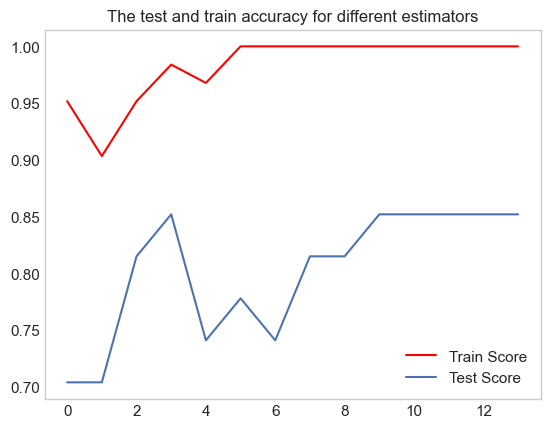

4


In [480]:
dt_train = []
dt_test = []
depth = []

for i in range(1, 15):
    my_random_forest = RandomForestClassifier(n_estimators=i, random_state=1)
    my_random_forest.fit(X_train, y_train)
    dt_train.append(my_random_forest.score(X_train, y_train))
    dt_test.append(my_random_forest.score(X_test, y_test))
    depth.append(i)

# Setting the seaborn style to set the background to white
sns.set_style("whitegrid")

plt.figure()
plt.title('The test and train accuracy for different estimators')

# Create the line graph for the training and test
plt.plot(dt_train, color='red', label='Train Score')
plt.plot(dt_test, label='Test Score')

# Remove the grids
plt.grid(False)

plt.legend()
plt.show()

print(depth[np.argmax(dt_test)])

##### 4.2.1.2.1 Now we found the optimal n_estimators as 11, the both train and test accuracy are increased.

In [183]:
# Predicting the test set results
y_pred_rand = my_random_forest.predict(X_test)

In [184]:
# Criação da matriz de confusão / DataFrame
print('The Confusion Matrix for Random Forest')
con_mat_lr_Word_2_VEC = confusion_matrix(y_test, y_pred_rand)
df_cm_lr_Word_2_VEC = pd.DataFrame(con_mat_lr_Word_2_VEC, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_lr_Word_2_VEC)

# Criação do relatório de classificação
print('The Classification Report for Random Forest')
report_lr_Word_2_VEC = classification_report(y_test, y_pred_rand, output_dict=True)
df_report_lr_Word_2_VEC = pd.DataFrame(report_lr_Word_2_VEC).transpose()
df_Third_Approach_Random_Forest_Pipeline = df_report_lr_Word_2_VEC
display(df_report_lr_Word_2_VEC)

The Confusion Matrix for Random Forest


Predicted 0  Predicted 1
True 0            3            5
True 1            2           16

The Classification Report for Random Forest


precision    recall  f1-score    support
-1             0.600000  0.375000  0.461538   8.000000
1              0.761905  0.888889  0.820513  18.000000
accuracy       0.730769  0.730769  0.730769   0.730769
macro avg      0.680952  0.631944  0.641026  26.000000
weighted avg   0.712088  0.730769  0.710059  26.000000

#### 4.2.3.3 XGBoost

In [185]:
y_train_mapped = y_train.map({-1: 0, 1: 1})
y_test_mapped = y_test.map({-1: 0, 1: 1})
XGB_model_Word_2_VEC = xgb.XGBClassifier(
    n_estimators=100,  # Número de árvores (ou estimadores) no modelo
    learning_rate=0.1,  # Taxa de aprendizado
    max_depth=3,  # Profundidade máxima da árvore
    random_state=42  # Semente para reproduzibilidade
)
XGB_model_Word_2_VEC.fit(X_train, y_train_mapped)

print(f"XG Boost train score: {XGB_model_Word_2_VEC.score(X_train, y_train_mapped)}")
print(f"XG Boost test score: {XGB_model_Word_2_VEC.score(X_test, y_test_mapped)}")

XG Boost train score: 0.9166666666666666
XG Boost test score: 0.8076923076923077


In [186]:
# Generate and display the confusion matrix
print('The Confusion Matrix for XGBoost')
con_mat_xgb_Word_2_VEC = confusion_matrix(y_test_mapped, XGB_model_Word_2_VEC.predict(X_test))
df_cm_xgb_Word_2_VEC = pd.DataFrame(con_mat_xgb_Word_2_VEC, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_xgb_Word_2_VEC)

# Generate and display the classification report
print('The Classification report for XGBoost')
report_xgb_Word_2_VEC = classification_report(y_test_mapped, XGB_model_Word_2_VEC.predict(X_test), output_dict=True)
df_report_xgb_Word_2_VEC = pd.DataFrame(report_xgb_Word_2_VEC).transpose()
display(df_report_xgb_Word_2_VEC)

The Confusion Matrix for XGBoost


Predicted 0  Predicted 1
True 0            3            5
True 1            0           18

The Classification report for XGBoost


precision    recall  f1-score    support
0              1.000000  0.375000  0.545455   8.000000
1              0.782609  1.000000  0.878049  18.000000
accuracy       0.807692  0.807692  0.807692   0.807692
macro avg      0.891304  0.687500  0.711752  26.000000
weighted avg   0.849498  0.807692  0.775712  26.000000

In [187]:
# Define the pipeline with an XGBoost classifier
estimators = [('classifier', xgb.XGBClassifier(random_state=1))]
pipe = Pipeline(estimators)

# Define the parameter grid for grid search
params = {
    'classifier__n_estimators': [100, 300, 500],
    'classifier__max_depth': [3, 4, 5],
    'classifier__learning_rate': [0.1, 0.01, 0.001]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search to the training data
fitted_search = grid_search.fit(X_train, y_train_mapped)

# Get the best estimator with optimal hyperparameters
best_estimator = fitted_search.best_estimator_

# Print the best estimator
print("Best Estimator:", best_estimator)


Best Estimator: Pipeline(steps=[('classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.01, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=4, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=1, reg_alpha=0,
                               reg_lambda=1, ...

In [188]:
# Create the XGBoost model with the specified hyperparameters
XGB_model_Word_2_VEC = xgb.XGBClassifier(random_state=1)

# Fit the model to the training data
XGB_model_Word_2_VEC.fit(X_train, y_train_mapped)

# Predicting the test set results
y_pred_XGB_Word_2_VEC = XGB_model_Word_2_VEC.predict(X_test)

# Training score
train_score = XGB_model_Word_2_VEC.score(X_train, y_train_mapped)
test_score = XGB_model_Word_2_VEC.score(X_test, y_test_mapped)

print(f"Score on training set: {train_score}")
print(f"Score on test set: {test_score}")

# Generate and display the confusion matrix
print('The Confusion Matrix for XGBoost')
con_mat_XGB_Word_2_VEC = confusion_matrix(y_test_mapped, y_pred_XGB_Word_2_VEC)
con_mat_XGB_Word_2_VEC = pd.DataFrame(con_mat_XGB_Word_2_VEC, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
con_mat_XGB_Word_2_VEC

# Generate and display the classification report
print('The Classification report for XGBoost')
report_xgb_Word_2_VEC = classification_report(y_test_mapped, XGB_model_Word_2_VEC.predict(X_test), output_dict=True)
df_report_xgb_Word_2_VEC = pd.DataFrame(report_xgb_Word_2_VEC).transpose()
df_Thord_Approach_xgb_Pipeline = df_report_xgb_Word_2_VEC
display(df_report_xgb_Word_2_VEC)

Score on training set: 0.95
Score on test set: 0.8846153846153846
The Confusion Matrix for XGBoost
The Classification report for XGBoost


precision    recall  f1-score    support
0              1.000000  0.625000  0.769231   8.000000
1              0.857143  1.000000  0.923077  18.000000
accuracy       0.884615  0.884615  0.884615   0.884615
macro avg      0.928571  0.812500  0.846154  26.000000
weighted avg   0.901099  0.884615  0.875740  26.000000

#### 4.2.3.4 Naive Bayes

In [189]:
# Create and fit the Naive Bayes model
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train) # Using X_train and y_train from your previous code

# Predicting the results of the test set
y_pred_nb = naive_bayes.predict(X_test) # Using X_test from your previous code

# Training score
train_score_NB = naive_bayes.score(X_train, y_train)
test_score_NB = naive_bayes.score(X_test, y_test)

print(f"Score on training set: {train_score_NB}")
print(f"Score on test set: {test_score_NB}")

Score on training set: 0.9833333333333333
Score on test set: 0.8846153846153846


In [190]:
# Creation of the confusion matrix / DataFrame for the Naive Bayes model
print('The Confusion Matrix for Naive Bayes')
con_mat_nb_Word_2_VEC = confusion_matrix(y_test, y_pred_nb)
df_cm_nb_Word_2_VEC = pd.DataFrame(con_mat_nb_Word_2_VEC, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_nb_Word_2_VEC)

# Creation of the classification report for the Naive Bayes model
print('The Classification Report for Naive Bayes')
report_nb_Word_2_VEC = classification_report(y_test, y_pred_nb, output_dict=True)
df_report_nb_Word_2_VEC = pd.DataFrame(report_nb_Word_2_VEC).transpose()
display(df_report_nb_Word_2_VEC)

The Confusion Matrix for Naive Bayes


Predicted 0  Predicted 1
True 0            7            1
True 1            2           16

The Classification Report for Naive Bayes


precision    recall  f1-score    support
-1             0.777778  0.875000  0.823529   8.000000
1              0.941176  0.888889  0.914286  18.000000
accuracy       0.884615  0.884615  0.884615   0.884615
macro avg      0.859477  0.881944  0.868908  26.000000
weighted avg   0.890900  0.884615  0.886361  26.000000

In [191]:
# Create an estimator with the Naive Bayes classifier
estimators = [('classifier', MultinomialNB())]
pipe = Pipeline(estimators)

# Define the parameters for grid search
params = {'classifier__alpha': [0.001, 0.01, 0.1, 1.0]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search model to the training data
fitted_search = grid_search.fit(X_train, y_train)

# Find the best estimator (model)
best_nb_model = fitted_search.best_estimator_

In [193]:
# Create and fit the Naive Bayes model (using the best parameters from the grid search)
best_alpha = fitted_search.best_params_['classifier__alpha']
naive_bayes_Word_2_VEC = MultinomialNB(alpha=best_alpha)
naive_bayes_Word_2_VEC.fit(X_train, y_train)

# Predictions in the test set
y_pred_nb = naive_bayes_Word_2_VEC.predict(X_test)

# Training score
train_score_NB = naive_bayes_Word_2_VEC.score(X_train, y_train)
test_score_NB = naive_bayes_Word_2_VEC.score(X_test, y_test)

print(f"Score on training set: {train_score_NB}")
print(f"Score on test set: {test_score_NB}")

# Creation of the confusion matrix / DataFrame
print('The Confusion Matrix for Naive Bayes')
con_mat_nb_Word_2_VEC = confusion_matrix(y_test, y_pred_nb)
df_cm_nb_Word_2_VEC = pd.DataFrame(con_mat_nb_Word_2_VEC, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_nb_Word_2_VEC)

# Creation of the classification report for Naive Bayes
print('The Classification Report for Naive Bayes')
report_nb_Word_2_VEC = classification_report(y_test, y_pred_nb, output_dict=True)
df_report_nb_Word_2_VEC = pd.DataFrame(report_nb_Word_2_VEC).transpose()
df_Thord_Approach_NB_Pipeline = df_report_nb_Word_2_VEC
display(df_report_nb_Word_2_VEC)

Score on training set: 1.0
Score on test set: 0.9230769230769231
The Confusion Matrix for Naive Bayes


Predicted 0  Predicted 1
True 0            7            1
True 1            1           17

The Classification Report for Naive Bayes


precision    recall  f1-score    support
-1             0.875000  0.875000  0.875000   8.000000
1              0.944444  0.944444  0.944444  18.000000
accuracy       0.923077  0.923077  0.923077   0.923077
macro avg      0.909722  0.909722  0.909722  26.000000
weighted avg   0.923077  0.923077  0.923077  26.000000

#### 4.2.3.5 Support Vector Machine

In [194]:
# Create and fit the SVM model
svm_model_Word_2_VEC = SVC(kernel='linear', C=1.0, random_state=1)
svm_model_Word_2_VEC.fit(X_train, y_train) # Using X_train and y_train from your previous code

# Predicting the results of the test set
y_pred_svm_Word_2_VEC = svm_model_Word_2_VEC.predict(X_test) # Using X_test from your previous code

# Training score
train_score_svm = svm_model_Word_2_VEC.score(X_train, y_train)
test_score_svm = svm_model_Word_2_VEC.score(X_test, y_test)

print(f"Score on training set: {train_score_svm}")
print(f"Score on test set: {test_score_svm}")

Score on training set: 1.0
Score on test set: 0.7692307692307693


In [195]:
# Creation of the confusion matrix / DataFrame for the SVM model
print('The Confusion Matrix for SVM')
con_mat_svm_Word_2_VEC = confusion_matrix(y_test, y_pred_svm)
df_cm_svm_Word_2_VEC = pd.DataFrame(con_mat_svm_Word_2_VEC, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_svm_Word_2_VEC)

# Creation of the classification report for the SVM model
print('The Classification Report for SVM')
report_svm_Word_2_VEC = classification_report(y_test, y_pred_svm_Word_2_VEC, output_dict=True)
df_report_svm_Word_2_VEC = pd.DataFrame(report_svm_Word_2_VEC).transpose()
display(df_report_svm_Word_2_VEC)

The Confusion Matrix for SVM


Predicted 0  Predicted 1
True 0            5            3
True 1            2           16

The Classification Report for SVM


precision    recall  f1-score    support
-1             0.666667  0.500000  0.571429   8.000000
1              0.800000  0.888889  0.842105  18.000000
accuracy       0.769231  0.769231  0.769231   0.769231
macro avg      0.733333  0.694444  0.706767  26.000000
weighted avg   0.758974  0.769231  0.758820  26.000000

In [196]:
# Create an estimator with the SVM classifier
estimators = [('classifier', SVC(kernel='linear', random_state=1))]
pipe = Pipeline(estimators)

# Define the parameters for grid search
params = {'classifier__C': [0.1, 1.0, 10.0], 'classifier__kernel': ['linear', 'rbf']}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search model to the training data
fitted_search = grid_search.fit(X_train, y_train)

# Find the best estimator (model)
best_svm_model = fitted_search.best_estimator_

In [198]:
# Create and fit the SVM model with the best parameters found
best_C = fitted_search.best_params_['classifier__C']
best_kernel = fitted_search.best_params_['classifier__kernel']
svm_model_Word_2_VEC = SVC(C=best_C, kernel=best_kernel, random_state=1)
svm_model_Word_2_VEC.fit(X_train, y_train)

# Predictions on the test set
y_pred_svm = svm_model_Word_2_VEC.predict(X_test)

# Training score
train_score_svm = svm_model_Word_2_VEC.score(X_train, y_train)
test_score_svm = svm_model_Word_2_VEC.score(X_test, y_test)

print(f"Score on training set: {train_score_svm}")
print(f"Score on test set: {test_score_svm}")

# Creation of the confusion matrix / DataFrame
print('The Confusion Matrix for SVM')
con_mat_svm_Word_2_VEC = confusion_matrix(y_test, y_pred_svm)
df_cm_svm_Word_2_VEC= pd.DataFrame(con_mat_svm_Word_2_VEC, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_svm_Word_2_VEC)

# Creation of the classification report for SVM
print('The Classification Report for SVM')
report_svm_Word_2_VEC = classification_report(y_test, y_pred_svm_Word_2_VEC, output_dict=True)
df_report_svm_Word_2_VEC = pd.DataFrame(report_svm_Word_2_VEC).transpose()
df_Third_Approach_SVM_Pipeline = df_report_svm_Word_2_VEC
display(df_report_svm_Word_2_VEC)

Score on training set: 0.9833333333333333
Score on test set: 0.8076923076923077
The Confusion Matrix for SVM


Predicted 0  Predicted 1
True 0            4            4
True 1            1           17

The Classification Report for SVM


precision    recall  f1-score    support
-1             0.666667  0.500000  0.571429   8.000000
1              0.800000  0.888889  0.842105  18.000000
accuracy       0.769231  0.769231  0.769231   0.769231
macro avg      0.733333  0.694444  0.706767  26.000000
weighted avg   0.758974  0.769231  0.758820  26.000000

### 4.2.4 Spacy 

In [495]:
nlp = spacy.load('en_core_web_sm')

# Process your text data and store the vectors in a list
text_vectors = []
for text in df.text:
    doc = nlp(text)
    text_vector = doc.vector  # Get the vector representation for the document
    text_vectors.append(text_vector)

# Create a DataFrame from the text vectors
X_df = pd.DataFrame(text_vectors)
# Define the vector of targets and matrix of features
y = df.sentiment
X = X_df
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

y.value_counts()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((62, 96), (27, 96), (62,), (27,))

#### 4.2.4.1 Logistic Regression

In [200]:
# Create and fit the logistic regression model
logreg = LogisticRegression(solver='lbfgs', multi_class='auto', random_state=1)
logreg.fit(X_train, y_train)  # Usando X_train e y_train do seu código anterior

# Predicting the test set results
y_pred_logreg = logreg.predict(X_test)  # Usando X_test do seu código anterior

# Training score
train_score_Spacy = logreg.score(X_train, y_train)
test_score_Spacy = logreg.score(X_test, y_test)

print(f"Score on training set: {train_score_Spacy}")
print(f"Score on test set: {test_score_Spacy}")

Score on training set: 0.75
Score on test set: 0.7307692307692307


In [203]:
print('The Confusion Matrix for Logistic Regression')
con_mat_lr_Spacy = confusion_matrix(y_test, y_pred_logreg)
df_cm_lr_Spacy = pd.DataFrame(con_mat_lr_Spacy, columns = ['Predicted 0','Predicted 1'], index = ['True 0','True 1'])
display(df_cm_lr_Spacy)
print('The Classification report for Logistic Regression')
report_Spacy = classification_report(y_test, y_pred_logreg, output_dict=True)
df_report_Spacy = pd.DataFrame(report_Spacy).transpose()
df_report_Spacy

The Confusion Matrix for Logistic Regression


Predicted 0  Predicted 1
True 0            1            7
True 1            0           18

The Classification report for Logistic Regression


precision    recall  f1-score    support
-1             1.000000  0.125000  0.222222   8.000000
1              0.720000  1.000000  0.837209  18.000000
accuracy       0.730769  0.730769  0.730769   0.730769
macro avg      0.860000  0.562500  0.529716  26.000000
weighted avg   0.806154  0.730769  0.647983  26.000000

In [204]:
estimators = [('classifier',LogisticRegression(solver='lbfgs',multi_class='auto',random_state=1))]
pipe = Pipeline(estimators)

params = {'classifier__C' : [10**j for j in range(-4,4)]}
grid_search = GridSearchCV(pipe, param_grid=params,cv=5)

fitted_search = grid_search.fit(X_train, y_train)

fitted_search.best_estimator_

c:\Users\Karim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Karim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Pipeline(steps=[('classifier', LogisticRegression(C=0.0001, random_state=1))])

In [205]:
logreg = LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=1,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False)
logreg.fit(X_train, y_train)

# Predicting the test set results
y_pred_logreg = logreg.predict(X_test)

# Training score
print(f"Score on training set: {logreg.score(X_train,y_train)}")
print(f"Score on test set: {logreg.score(X_test,y_test)}")

# Criação da matriz de confusão / DataFrame
print('The Confusion Matrix for Logistic Regression')
con_mat_lr_final_Spacy = confusion_matrix(y_test, y_pred_logreg)
df_cm_lr_final_Spacy = pd.DataFrame(con_mat_lr_final_Spacy, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_lr_final_Spacy)

# Criação do relatório de classificação
print('The Classification Report  for Logistic Regression')
report_lr_final_Spacy = classification_report(y_test, y_pred_logreg, output_dict=True)
df_report_lr_final_Spacy = pd.DataFrame(report_lr_final_Spacy).transpose()
df_Fourth_Aproach_Logistic_Regression_Pipline = df_report_lr_final_Spacy
display(df_report_lr_final_Spacy)

Score on training set: 0.9166666666666666
Score on test set: 0.7307692307692307
The Confusion Matrix for Logistic Regression


Predicted 0  Predicted 1
True 0            2            6
True 1            1           17

The Classification Report  for Logistic Regression


precision    recall  f1-score    support
-1             0.666667  0.250000  0.363636   8.000000
1              0.739130  0.944444  0.829268  18.000000
accuracy       0.730769  0.730769  0.730769   0.730769
macro avg      0.702899  0.597222  0.596452  26.000000
weighted avg   0.716834  0.730769  0.685997  26.000000

#### 4.2.4.2 Random Forest

In [482]:
my_random_forest_Spacy = RandomForestClassifier(random_state=1)
my_random_forest_Spacy.fit(X_train,y_train)
print(f"Random Forest: {my_random_forest_Spacy.score(X_train,y_train)}")
print(f"Random Forest: {my_random_forest_Spacy.score(X_test, y_test)}")

Random Forest: 1.0
Random Forest: 0.7407407407407407


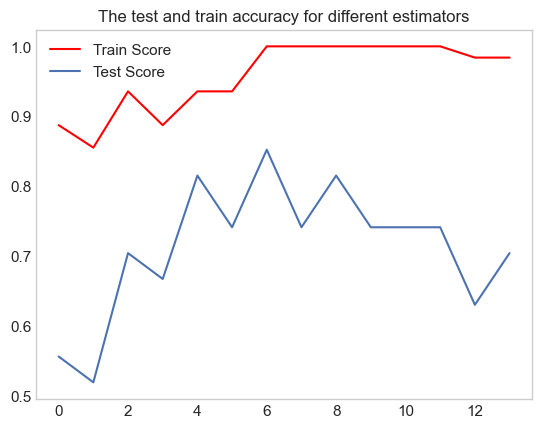

7


In [483]:
dt_train = []
dt_test = []
depth = []

for i in range(1, 15):
    my_random_forest = RandomForestClassifier(n_estimators=i, random_state=1)
    my_random_forest.fit(X_train, y_train)
    dt_train.append(my_random_forest.score(X_train, y_train))
    dt_test.append(my_random_forest.score(X_test, y_test))
    depth.append(i)

# Setting the seaborn style to set the background to white
sns.set_style("whitegrid")

plt.figure()
plt.title('The test and train accuracy for different estimators')

# Create the line graph for the training and test
plt.plot(dt_train, color='red', label='Train Score')
plt.plot(dt_test, label='Test Score')

# Remove the grids
plt.grid(False)

plt.legend()
plt.show()

print(depth[np.argmax(dt_test)])

##### 4.2.1.2.1 Now we found the optimal n_estimators as 11, the both train and test accuracy are increased.

In [208]:
# Predicting the test set results
y_pred_rand = my_random_forest_Spacy.predict(X_test)

In [210]:
# Criação da matriz de confusão / DataFrame
print('The Confusion Matrix for Random Forest')
con_mat_lr_Spacy = confusion_matrix(y_test, y_pred_rand)
df_cm_lr_Spacy = pd.DataFrame(con_mat_lr_Spacy, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_lr_Spacy)

# Criação do relatório de classificação
print('The Classification Report for Random Forest')
report_lr_Spacy = classification_report(y_test, y_pred_rand, output_dict=True)
df_report_lr_Spacy = pd.DataFrame(report_lr_Spacy).transpose()
df_Fourth_Aproach_RF_Pipline = df_report_lr_Spacy
display(df_report_lr_Spacy)

The Confusion Matrix for Random Forest


Predicted 0  Predicted 1
True 0            1            7
True 1            0           18

The Classification Report for Random Forest


precision    recall  f1-score    support
-1             1.000000  0.125000  0.222222   8.000000
1              0.720000  1.000000  0.837209  18.000000
accuracy       0.730769  0.730769  0.730769   0.730769
macro avg      0.860000  0.562500  0.529716  26.000000
weighted avg   0.806154  0.730769  0.647983  26.000000

#### 4.2.4.3 XGBoost

In [211]:
y_train_mapped = y_train.map({-1: 0, 1: 1})
y_test_mapped = y_test.map({-1: 0, 1: 1})
XGB_model_Spacy = xgb.XGBClassifier(
    n_estimators=100,  # Número de árvores (ou estimadores) no modelo
    learning_rate=0.1,  # Taxa de aprendizado
    max_depth=3,  # Profundidade máxima da árvore
    random_state=42  # Semente para reproduzibilidade
)
XGB_model_Spacy.fit(X_train, y_train_mapped)

print(f"XG Boost train score: {XGB_model_Spacy.score(X_train, y_train_mapped)}")
print(f"XG Boost test score: {XGB_model_Spacy.score(X_test, y_test_mapped)}")

XG Boost train score: 1.0
XG Boost test score: 0.7307692307692307


In [212]:
# Generate and display the confusion matrix
print('The Confusion Matrix for XGBoost')
con_mat_xgb_Spacy = confusion_matrix(y_test_mapped, XGB_model_Spacy.predict(X_test))
df_cm_xgb_Spacy = pd.DataFrame(con_mat_xgb_CV, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_xgb_Spacy)

# Generate and display the classification report
print('The Classification report for XGBoost')
report_xgb_Spacy = classification_report(y_test_mapped, XGB_model_Spacy.predict(X_test), output_dict=True)
df_report_xgb_Spacy = pd.DataFrame(report_xgb_Spacy).transpose()
display(df_report_xgb_Spacy)

The Confusion Matrix for XGBoost


Predicted 0  Predicted 1
True 0            3            5
True 1            0           18

The Classification report for XGBoost


precision    recall  f1-score    support
0              0.600000  0.375000  0.461538   8.000000
1              0.761905  0.888889  0.820513  18.000000
accuracy       0.730769  0.730769  0.730769   0.730769
macro avg      0.680952  0.631944  0.641026  26.000000
weighted avg   0.712088  0.730769  0.710059  26.000000

In [213]:
# Define the pipeline with an XGBoost classifier
estimators = [('classifier', xgb.XGBClassifier(random_state=1))]
pipe = Pipeline(estimators)

# Define the parameter grid for grid search
params = {
    'classifier__n_estimators': [100, 300, 500],
    'classifier__max_depth': [3, 4, 5],
    'classifier__learning_rate': [0.1, 0.01, 0.001]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search to the training data
fitted_search = grid_search.fit(X_train, y_train_mapped)

# Get the best estimator with optimal hyperparameters
best_estimator = fitted_search.best_estimator_

# Print the best estimator
print("Best Estimator:", best_estimator)


Best Estimator: Pipeline(steps=[('classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.1, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=3, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=300, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=1, reg_alpha=0,
                               reg_lambda=1, ...)

In [215]:
# Create the XGBoost model with the specified hyperparameters
XGB_model_Spacy = xgb.XGBClassifier(random_state=1)

# Fit the model to the training data
XGB_model_Spacy.fit(X_train, y_train_mapped)

# Predicting the test set results
y_pred_XGB_Spacy = XGB_model_Spacy.predict(X_test)

# Training score
train_score = XGB_model_Spacy.score(X_train, y_train_mapped)
test_score = XGB_model_Spacy.score(X_test, y_test_mapped)

print(f"Score on training set: {train_score}")
print(f"Score on test set: {test_score}")

# Generate and display the confusion matrix
print('The Confusion Matrix for XGBoost')
con_mat_XGB_Spacy = confusion_matrix(y_test_mapped, y_pred_XGB_Spacy)
con_mat_XGB_Spacy = pd.DataFrame(con_mat_XGB_Spacy, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
con_mat_XGB_Spacy

# Generate and display the classification report
print('The Classification report for XGBoost')
report_xgb_Spacy = classification_report(y_test_mapped, XGB_model_Spacy.predict(X_test), output_dict=True)
df_report_xgb_Spacy = pd.DataFrame(report_xgb_Spacy).transpose()
df_Fourth_Aproach_xgb_Pipline = df_report_xgb_Spacy
display(df_report_xgb_Spacy)

Score on training set: 1.0
Score on test set: 0.7307692307692307
The Confusion Matrix for XGBoost
The Classification report for XGBoost


precision    recall  f1-score    support
0              0.600000  0.375000  0.461538   8.000000
1              0.761905  0.888889  0.820513  18.000000
accuracy       0.730769  0.730769  0.730769   0.730769
macro avg      0.680952  0.631944  0.641026  26.000000
weighted avg   0.712088  0.730769  0.710059  26.000000

#### 4.2.4.4 Naive Bayes

In [496]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the Multinomial Naive Bayes model on the scaled data
# Create and fit the Naive Bayes model
naive_bayes_Spacy = MultinomialNB()
naive_bayes_Spacy.fit(X_train_scaled, y_train)

# Predicting the results of the test set
y_pred_nb = naive_bayes_Spacy.predict(X_test) # Using X_test from your previous code

# Training score
train_score_NB = naive_bayes_Spacy.score(X_train, y_train)
test_score_NB = naive_bayes_Spacy.score(X_test, y_test)

print(f"Score on training set: {train_score_NB}")
print(f"Score on test set: {test_score_NB}")

Score on training set: 0.7741935483870968
Score on test set: 0.7777777777777778


In [497]:
# Creation of the confusion matrix / DataFrame for the Naive Bayes model
print('The Confusion Matrix for Naive Bayes')
con_mat_nb_Spacy = confusion_matrix(y_test, y_pred_nb)
df_cm_nb_Spacy = pd.DataFrame(con_mat_nb_Spacy, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_nb_Spacy)

# Creation of the classification report for the Naive Bayes model
print('The Classification Report for Naive Bayes')
report_nb_Spacy = classification_report(y_test, y_pred_nb, output_dict=True)
df_report_nb_Spacy = pd.DataFrame(report_nb_Spacy).transpose()
display(df_report_nb_Spacy)

The Confusion Matrix for Naive Bayes


Predicted 0  Predicted 1
True 0            0            6
True 1            0           21

The Classification Report for Naive Bayes


c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision    recall  f1-score    support
-1             0.000000  0.000000  0.000000   6.000000
1              0.777778  1.000000  0.875000  21.000000
accuracy       0.777778  0.777778  0.777778   0.777778
macro avg      0.388889  0.500000  0.437500  27.000000
weighted avg   0.604938  0.777778  0.680556  27.000000

In [498]:
# Create a pipeline without scaling for grid search
estimators = [('classifier', MultinomialNB())]
pipe = Pipeline(estimators)

# Define the parameters for grid search
params = {'classifier__alpha': [0.001, 0.01, 0.1, 1.0]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search model to the training data (unscaled)
fitted_search = grid_search.fit(X_train, y_train)

# Find the best estimator (model)
best_nb_model = fitted_search.best_estimator_

# Apply Min-Max Scaling to features before fitting the final model
#scaler = MinMaxScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

#best_nb_model.fit(X_train, y_train)

# Predicting the results of the test set
y_pred_nb = best_nb_model.predict(X_test)

# Training score
train_score_NB = best_nb_model.score(X_train, y_train)
test_score_NB = best_nb_model.score(X_test, y_test)

print(f"Score on training set: {train_score_NB}")
print(f"Score on test set: {test_score_NB}")

ValueError: 
All the 20 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\pport\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\pport\anaconda3\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\pport\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\pport\anaconda3\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\pport\anaconda3\Lib\site-packages\sklearn\naive_bayes.py", line 772, in fit
    self._count(X, Y)
  File "c:\Users\pport\anaconda3\Lib\site-packages\sklearn\naive_bayes.py", line 894, in _count
    check_non_negative(X, "MultinomialNB (input X)")
  File "c:\Users\pport\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1489, in check_non_negative
    raise ValueError("Negative values in data passed to %s" % whom)
ValueError: Negative values in data passed to MultinomialNB (input X)


In [224]:
# Create and fit the Naive Bayes model (using the best parameters from the grid search)
best_alpha = fitted_search.best_params_['classifier__alpha']
naive_bayes = MultinomialNB(alpha=best_alpha)
naive_bayes.fit(X_train, y_train)

# Predictions in the test set
y_pred_nb = naive_bayes.predict(X_test)

# Training score
train_score_NB = naive_bayes.score(X_train, y_train)
test_score_NB = naive_bayes.score(X_test, y_test)

print(f"Score on training set: {train_score_NB}")
print(f"Score on test set: {test_score_NB}")

# Creation of the confusion matrix / DataFrame
print('The Confusion Matrix for Naive Bayes')
con_mat_nb = confusion_matrix(y_test, y_pred_nb)
df_cm_nb = pd.DataFrame(con_mat_nb, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_nb)

# Creation of the classification report for Naive Bayes
print('The Classification Report for Naive Bayes')
report_nb = classification_report(y_test, y_pred_nb, output_dict=True)
df_report_nb = pd.DataFrame(report_nb).transpose()
display(df_report_nb)

KeyError: 'classifier__alpha'

#### 4.2.4.5 Support Vector Machine

In [ ]:
# Create and fit the SVM model
svm_model_Spacy = SVC(kernel='linear', C=1.0, random_state=1)
svm_model_Spacy.fit(X_train, y_train) # Using X_train and y_train from your previous code

# Predicting the results of the test set
y_pred_svm = svm_model_Spacy.predict(X_test) # Using X_test from your previous code

# Training score
train_score_svm = svm_model_Spacy.score(X_train, y_train)
test_score_svm = svm_model_Spacy.score(X_test, y_test)

print(f"Score on training set: {train_score_svm}")
print(f"Score on test set: {test_score_svm}")

Score on training set: 0.8333333333333334
Score on test set: 0.6923076923076923


In [ ]:
# Creation of the confusion matrix / DataFrame for the SVM model
print('The Confusion Matrix for SVM')
con_mat_svm_Spacy = confusion_matrix(y_test, y_pred_svm)
df_cm_svm_Spacy = pd.DataFrame(con_mat_svm_Spacy, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_svm)

# Creation of the classification report for the SVM model
print('The Classification Report for SVM')
report_svm_Spacy = classification_report(y_test, y_pred_svm, output_dict=True)
df_report_svm_Spacy = pd.DataFrame(report_svm_Spacy).transpose()
display(df_report_svm_Spacy)

The Confusion Matrix for SVM


Predicted 0  Predicted 1
True 0            1            7
True 1            0           18

The Classification Report for SVM


c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision    recall  f1-score    support
-1             0.000000  0.000000  0.000000   8.000000
1              0.692308  1.000000  0.818182  18.000000
accuracy       0.692308  0.692308  0.692308   0.692308
macro avg      0.346154  0.500000  0.409091  26.000000
weighted avg   0.479290  0.692308  0.566434  26.000000

In [ ]:
# Create an estimator with the SVM classifier
estimators = [('classifier', SVC(kernel='linear', random_state=1))]
pipe = Pipeline(estimators)

# Define the parameters for grid search
params = {'classifier__C': [0.1, 1.0, 10.0], 'classifier__kernel': ['linear', 'rbf']}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search model to the training data
fitted_search = grid_search.fit(X_train, y_train)

# Find the best estimator (model)
best_svm_model = fitted_search.best_estimator_

In [ ]:
# Create and fit the SVM model with the best parameters found
best_C = fitted_search.best_params_['classifier__C']
best_kernel = fitted_search.best_params_['classifier__kernel']
svm_model_Spacy = SVC(C=best_C, kernel=best_kernel, random_state=1)
svm_model_Spacy.fit(X_train, y_train)

# Predictions on the test set
y_pred_svm = svm_model_Spacy.predict(X_test)

# Training score
train_score_svm = svm_model_Spacy.score(X_train, y_train)
test_score_svm = svm_model_Spacy.score(X_test, y_test)

print(f"Score on training set: {train_score_svm}")
print(f"Score on test set: {test_score_svm}")

# Creation of the confusion matrix / DataFrame
print('The Confusion Matrix for SVM')
con_mat_svm_Spacy = confusion_matrix(y_test, y_pred_svm)
df_cm_svm_Spacy = pd.DataFrame(con_mat_svm_Spacy, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_svm_Spacy)

# Creation of the classification report for SVM
print('The Classification Report for SVM')
report_svm_Spacy = classification_report(y_test, y_pred_svm, output_dict=True)
df_report_svm_Spacy = pd.DataFrame(report_svm_Spacy).transpose()
display(df_report_svm_Spacy)

Score on training set: 0.6833333333333333
Score on test set: 0.6923076923076923
The Confusion Matrix for SVM


Predicted 0  Predicted 1
True 0            0            8
True 1            0           18

The Classification Report for SVM


c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision    recall  f1-score    support
-1             0.000000  0.000000  0.000000   8.000000
1              0.692308  1.000000  0.818182  18.000000
accuracy       0.692308  0.692308  0.692308   0.692308
macro avg      0.346154  0.500000  0.409091  26.000000
weighted avg   0.479290  0.692308  0.566434  26.000000

### 4.2.5 Custom 

In [490]:
# Vectorization
vectorizer = CountVectorizer(
    tokenizer=lambda text: text.split(), # Custom tokenizer (split by spaces)
    stop_words='english', # Remove common English words (optional)
    max_features=100 # Limit the vocabulary to the 100 most frequent words (optional)
)

# Fit the vectorizer to the text data
vectorizer.fit(df['text'])

# Transform the text data into a matrix of features
X = vectorizer.transform(df['text'])

# Create a DataFrame with the characteristics
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Define the vector of targets (sentiment)
y = df['sentiment']

# Split the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.3, random_state=42, stratify=y)

# Check the number of occurrences of each sentiment class
y.value_counts()

# Check the dimensions of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

c:\Users\pport\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


((62, 100), (27, 100), (62,), (27,))

#### 4.2.5.1 Logistic Regression

In [ ]:
# Create and fit the logistic regression model
logreg = LogisticRegression(solver='lbfgs', multi_class='auto', random_state=1)
logreg.fit(X_train, y_train)  # Usando X_train e y_train do seu código anterior

# Predicting the test set results
y_pred_logreg = logreg.predict(X_test)  # Usando X_test do seu código anterior

# Training score
train_score_Custom = logreg.score(X_train, y_train)
test_score_Custom = logreg.score(X_test, y_test)

print(f"Score on training set: {train_score_Custom}")
print(f"Score on test set: {test_score_Custom}")

Score on training set: 0.75
Score on test set: 0.6923076923076923


In [ ]:
print('The Confusion Matrix for Logistic Regression')
con_mat_lr_Custom = confusion_matrix(y_test, y_pred_logreg)
df_cm_lr_Custom = pd.DataFrame(con_mat_lr_Custom, columns = ['Predicted 0','Predicted 1'], index = ['True 0','True 1'])
display(df_cm_lr_Custom)
print('The Classification report for Logistic Regression')
report_Custom = classification_report(y_test, y_pred_logreg, output_dict=True)
df_report_Custom = pd.DataFrame(report_Custom).transpose()
df_report_Custom

The Confusion Matrix for Logistic Regression


Predicted 0  Predicted 1
True 0            0            8
True 1            0           18

The Classification report for Logistic Regression


c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision    recall  f1-score    support
-1             0.000000  0.000000  0.000000   8.000000
1              0.692308  1.000000  0.818182  18.000000
accuracy       0.692308  0.692308  0.692308   0.692308
macro avg      0.346154  0.500000  0.409091  26.000000
weighted avg   0.479290  0.692308  0.566434  26.000000

In [ ]:
estimators = [('classifier',LogisticRegression(solver='lbfgs',multi_class='auto',random_state=1))]
pipe = Pipeline(estimators)

params = {'classifier__C' : [10**j for j in range(-4,4)]}
grid_search = GridSearchCV(pipe, param_grid=params,cv=5)

fitted_search = grid_search.fit(X_train, y_train)

fitted_search.best_estimator_

c:\Users\pport\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Pipeline(steps=[('classifier', LogisticRegression(C=0.0001, random_state=1))])

In [ ]:
logreg = LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=1,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False)
logreg.fit(X_train, y_train)

# Predicting the test set results
y_pred_logreg = logreg.predict(X_test)

# Training score
print(f"Score on training set: {logreg.score(X_train,y_train)}")
print(f"Score on test set: {logreg.score(X_test,y_test)}")

# Criação da matriz de confusão / DataFrame
print('The Confusion Matrix for Logistic Regression')
con_mat_lr_final_Custom = confusion_matrix(y_test, y_pred_logreg)
df_cm_lr_final_Custom = pd.DataFrame(con_mat_lr_final_Custom, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_lr_final_Custom)

# Criação do relatório de classificação
print('The Classification Report  for Logistic Regression')
report_lr_final_Custom = classification_report(y_test, y_pred_logreg, output_dict=True)
df_report_lr_final_Custom = pd.DataFrame(report_lr_final_Custom).transpose()
display(df_report_lr_final_Custom)

Score on training set: 0.9333333333333333
Score on test set: 0.7307692307692307
The Confusion Matrix for Logistic Regression


Predicted 0  Predicted 1
True 0            1            7
True 1            0           18

The Classification Report  for Logistic Regression


precision    recall  f1-score    support
-1             1.000000  0.125000  0.222222   8.000000
1              0.720000  1.000000  0.837209  18.000000
accuracy       0.730769  0.730769  0.730769   0.730769
macro avg      0.860000  0.562500  0.529716  26.000000
weighted avg   0.806154  0.730769  0.647983  26.000000

####  4.2.5.2  Random Forest

In [488]:
my_random_forest_Custom = RandomForestClassifier(random_state=1)
my_random_forest_Custom.fit(X_train,y_train)
print(f"Random Forest: {my_random_forest_Custom.score(X_train,y_train)}")
print(f"Random Forest: {my_random_forest_Custom.score(X_test, y_test)}")

Random Forest: 0.9838709677419355
Random Forest: 0.8148148148148148


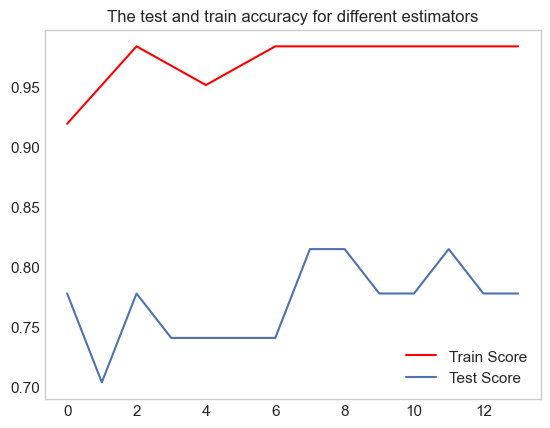

8


In [489]:
dt_train = []
dt_test = []
depth = []

for i in range(1, 15):
    my_random_forest = RandomForestClassifier(n_estimators=i, random_state=1)
    my_random_forest.fit(X_train, y_train)
    dt_train.append(my_random_forest.score(X_train, y_train))
    dt_test.append(my_random_forest.score(X_test, y_test))
    depth.append(i)

# Setting the seaborn style to set the background to white
sns.set_style("whitegrid")

plt.figure()
plt.title('The test and train accuracy for different estimators')

# Create the line graph for the training and test
plt.plot(dt_train, color='red', label='Train Score')
plt.plot(dt_test, label='Test Score')

# Remove the grids
plt.grid(False)

plt.legend()
plt.show()

print(depth[np.argmax(dt_test)])

##### 4.2.1.2.1 Now we found the optimal n_estimators as 11, the both train and test accuracy are increased.

In [ ]:
# Predicting the test set results
y_pred_rand = my_random_forest.predict(X_test)

In [ ]:
# Criação da matriz de confusão / DataFrame
print('The Confusion Matrix for Random Forest')
con_mat_lr_Custom = confusion_matrix(y_test, y_pred_rand)
df_cm_lr_Custom = pd.DataFrame(con_mat_lr_Custom, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_lr_Custom)

# Criação do relatório de classificação
print('The Classification Report for Random Forest')
report_lr_Custom = classification_report(y_test, y_pred_rand, output_dict=True)
df_report_lr_Custom = pd.DataFrame(report_lr_Custom).transpose()
display(df_report_lr_Custom)

The Confusion Matrix for Random Forest


Predicted 0  Predicted 1
True 0            2            6
True 1            6           12

The Classification Report for Random Forest


precision    recall  f1-score    support
-1             0.250000  0.250000  0.250000   8.000000
1              0.666667  0.666667  0.666667  18.000000
accuracy       0.538462  0.538462  0.538462   0.538462
macro avg      0.458333  0.458333  0.458333  26.000000
weighted avg   0.538462  0.538462  0.538462  26.000000

####  4.2.5.3  XGBoost

In [ ]:
y_train_mapped = y_train.map({-1: 0, 1: 1})
y_test_mapped = y_test.map({-1: 0, 1: 1})
XGB_model_Custom = xgb.XGBClassifier(
    n_estimators=100,  # Número de árvores (ou estimadores) no modelo
    learning_rate=0.1,  # Taxa de aprendizado
    max_depth=3,  # Profundidade máxima da árvore
    random_state=42  # Semente para reproduzibilidade
)
XGB_model_Custom.fit(X_train, y_train_mapped)

print(f"XG Boost train score: {XGB_model_Custom.score(X_train, y_train_mapped)}")
print(f"XG Boost test score: {XGB_model_Custom.score(X_test, y_test_mapped)}")

XG Boost train score: 1.0
XG Boost test score: 0.7692307692307693


In [ ]:
# Generate and display the confusion matrix
print('The Confusion Matrix for XGBoost')
con_mat_xgb_Custom = confusion_matrix(y_test_mapped, XGB_model_Custom.predict(X_test))
df_cm_xgb_Custom = pd.DataFrame(con_mat_xgb_Custom, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_xgb_Custom)

# Generate and display the classification report
print('The Classification report for XGBoost')
report_xgb_Custom = classification_report(y_test_mapped, XGB_model_Custom.predict(X_test), output_dict=True)
df_report_xgb_Custom = pd.DataFrame(report_xgb_Custom).transpose()
display(df_report_xgb_Custom)

The Confusion Matrix for XGBoost


Predicted 0  Predicted 1
True 0            2            6
True 1            0           18

The Classification report for XGBoost


precision    recall  f1-score    support
0              1.000000  0.250000  0.400000   8.000000
1              0.750000  1.000000  0.857143  18.000000
accuracy       0.769231  0.769231  0.769231   0.769231
macro avg      0.875000  0.625000  0.628571  26.000000
weighted avg   0.826923  0.769231  0.716484  26.000000

In [ ]:
# Define the pipeline with an XGBoost classifier
estimators = [('classifier', xgb.XGBClassifier(random_state=1))]
pipe = Pipeline(estimators)

# Define the parameter grid for grid search
params = {
    'classifier__n_estimators': [100, 300, 500],
    'classifier__max_depth': [3, 4, 5],
    'classifier__learning_rate': [0.1, 0.01, 0.001]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search to the training data
fitted_search = grid_search.fit(X_train, y_train_mapped)

# Get the best estimator with optimal hyperparameters
best_estimator = fitted_search.best_estimator_

# Print the best estimator
print("Best Estimator:", best_estimator)


Best Estimator: Pipeline(steps=[('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=300,
                               n_

In [ ]:
# Create the XGBoost model with the specified hyperparameters
XGB_model_Custom = xgb.XGBClassifier(random_state=1)

# Fit the model to the training data
XGB_model_Custom.fit(X_train, y_train_mapped)

# Predicting the test set results
y_pred_XGB_Custom = XGB_model_Custom.predict(X_test)

# Training score
train_score = XGB_model_Custom.score(X_train, y_train_mapped)
test_score = XGB_model_Custom.score(X_test, y_test_mapped)

print(f"Score on training set: {train_score}")
print(f"Score on test set: {test_score}")

# Generate and display the confusion matrix
print('The Confusion Matrix for XGBoost')
con_mat_XGB_Custom = confusion_matrix(y_test_mapped, y_pred_XGB_Custom)
con_mat_XGB_Custom = pd.DataFrame(con_mat_XGB_Custom, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
con_mat_XGB_Custom

# Generate and display the classification report
print('The Classification report for XGBoost')
report_xgb_Custom = classification_report(y_test_mapped, XGB_model_Custom.predict(X_test), output_dict=True)
df_report_xgb_Custom = pd.DataFrame(report_xgb_Custom).transpose()
display(df_report_xgb_Custom)

Score on training set: 1.0
Score on test set: 0.7692307692307693
The Confusion Matrix for XGBoost
The Classification report for XGBoost


precision    recall  f1-score    support
0              1.000000  0.250000  0.400000   8.000000
1              0.750000  1.000000  0.857143  18.000000
accuracy       0.769231  0.769231  0.769231   0.769231
macro avg      0.875000  0.625000  0.628571  26.000000
weighted avg   0.826923  0.769231  0.716484  26.000000

In [246]:
# Replace -1 with 0 in the sentiment column
df['sentiment'] = df['sentiment'].replace(-1, 0)

# Definir o vetor de alvos (sentimento)
y = df['sentiment']

# Realizar a divisão entre conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.3, random_state=42, stratify=y)

####  4.2.5.4  Naive Bayes

In [491]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the Multinomial Naive Bayes model on the scaled data
# Create and fit the Naive Bayes model
naive_bayes_Custom = MultinomialNB()
naive_bayes_Custom.fit(X_train_scaled, y_train)

# Predicting the results of the test set
y_pred_nb = naive_bayes_Custom.predict(X_test) # Using X_test from your previous code

# Training score
train_score_NB = naive_bayes_Custom.score(X_train, y_train)
test_score_NB = naive_bayes_Custom.score(X_test, y_test)

print(f"Score on training set: {train_score_NB}")
print(f"Score on test set: {test_score_NB}")

Score on training set: 0.9193548387096774
Score on test set: 0.8148148148148148


c:\Users\pport\anaconda3\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


In [492]:
# Creation of the confusion matrix / DataFrame for the Naive Bayes model
print('The Confusion Matrix for Naive Bayes')
con_mat_nb_Custom = confusion_matrix(y_test, y_pred_nb)
df_cm_nb_Custom = pd.DataFrame(con_mat_nb_Custom, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_nb_Custom)

# Creation of the classification report for the Naive Bayes model
print('The Classification Report for Naive Bayes')
report_nb_Custom = classification_report(y_test, y_pred_nb, output_dict=True)
df_report_nb_Custom = pd.DataFrame(report_nb_Custom).transpose()
display(df_report_nb_Custom)

The Confusion Matrix for Naive Bayes


Predicted 0  Predicted 1
True 0            4            2
True 1            3           18

The Classification Report for Naive Bayes


precision    recall  f1-score    support
-1             0.571429  0.666667  0.615385   6.000000
1              0.900000  0.857143  0.878049  21.000000
accuracy       0.814815  0.814815  0.814815   0.814815
macro avg      0.735714  0.761905  0.746717  27.000000
weighted avg   0.826984  0.814815  0.819679  27.000000

In [493]:
# Create an estimator with the Naive Bayes classifier
estimators = [('classifier', MultinomialNB())]
pipe = Pipeline(estimators)

# Define the parameters for grid search
params = {'classifier__alpha': [0.001, 0.01, 0.1, 1.0]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search model to the training data
fitted_search = grid_search.fit(X_train, y_train)

# Find the best estimator (model)
best_nb_model = fitted_search.best_estimator_

In [494]:
# Create and fit the Naive Bayes model (using the best parameters from the grid search)
best_alpha = fitted_search.best_params_['classifier__alpha']
naive_bayes_Custom = MultinomialNB(alpha=best_alpha)
naive_bayes_Custom.fit(X_train, y_train)

# Predictions in the test set
y_pred_nb = naive_bayes_Custom.predict(X_test)

# Training score
train_score_NB = naive_bayes_Custom.score(X_train, y_train)
test_score_NB = naive_bayes_Custom.score(X_test, y_test)

print(f"Score on training set: {train_score_NB}")
print(f"Score on test set: {test_score_NB}")

# Creation of the confusion matrix / DataFrame
print('The Confusion Matrix for Naive Bayes')
con_mat_nb_Custom = confusion_matrix(y_test, y_pred_nb)
df_cm_nb_Custom = pd.DataFrame(con_mat_nb_Custom, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_nb_Custom)

# Creation of the classification report for Naive Bayes
print('The Classification Report for Naive Bayes')
report_nb_Custom = classification_report(y_test, y_pred_nb, output_dict=True)
df_report_nb_Custom = pd.DataFrame(report_nb_Custom).transpose()
df_Fourth_Aproach_NB_Pipeline = df_report_nb_Custom
display(df_report_nb_Custom)

Score on training set: 0.9516129032258065
Score on test set: 0.7777777777777778
The Confusion Matrix for Naive Bayes


Predicted 0  Predicted 1
True 0            3            3
True 1            3           18

The Classification Report for Naive Bayes


precision    recall  f1-score    support
-1             0.500000  0.500000  0.500000   6.000000
1              0.857143  0.857143  0.857143  21.000000
accuracy       0.777778  0.777778  0.777778   0.777778
macro avg      0.678571  0.678571  0.678571  27.000000
weighted avg   0.777778  0.777778  0.777778  27.000000

####  4.2.5.5 Support Vector Machine

In [251]:
# Replace back 0 with -1 in the sentiment column
df['sentiment'] = df['sentiment'].replace(0, -1)

# Definir o vetor de alvos (sentimento)
y = df['sentiment']

# Realizar a divisão entre conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.3, random_state=42, stratify=y)

In [252]:
# Create and fit the SVM model
svm_model_Custom = SVC(kernel='linear', C=1.0, random_state=1)
svm_model_Custom.fit(X_train, y_train) # Using X_train and y_train from your previous code

# Predicting the results of the test set
y_pred_svm_Custom = svm_model_Custom.predict(X_test) # Using X_test from your previous code

# Training score
train_score_svm = svm_model_Custom.score(X_train, y_train)
test_score_svm = svm_model_Custom.score(X_test, y_test)

print(f"Score on training set: {train_score_svm}")
print(f"Score on test set: {test_score_svm}")

Score on training set: 1.0
Score on test set: 0.8461538461538461


In [253]:
# Creation of the confusion matrix / DataFrame for the SVM model
print('The Confusion Matrix for SVM')
con_mat_svm_Custom = confusion_matrix(y_test, y_pred_svm)
df_cm_svm_Custom = pd.DataFrame(con_mat_svm_Custom, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_svm_Custom)

# Creation of the classification report for the SVM model
print('The Classification Report for SVM')
report_svm_Custom = classification_report(y_test, y_pred_svm_Custom, output_dict=True)
df_report_svm_Custom = pd.DataFrame(report_svm_Custom).transpose()
display(df_report_svm_Custom)

The Confusion Matrix for SVM


Predicted 0  Predicted 1
True 0            4            4
True 1            1           17

The Classification Report for SVM


precision    recall  f1-score    support
-1             0.750000  0.750000  0.750000   8.000000
1              0.888889  0.888889  0.888889  18.000000
accuracy       0.846154  0.846154  0.846154   0.846154
macro avg      0.819444  0.819444  0.819444  26.000000
weighted avg   0.846154  0.846154  0.846154  26.000000

In [254]:
# Create an estimator with the SVM classifier
estimators = [('classifier', SVC(kernel='linear', random_state=1))]
pipe = Pipeline(estimators)

# Define the parameters for grid search
params = {'classifier__C': [0.1, 1.0, 10.0], 'classifier__kernel': ['linear', 'rbf']}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search model to the training data
fitted_search = grid_search.fit(X_train, y_train)

# Find the best estimator (model)
best_svm_model = fitted_search.best_estimator_

In [255]:
# Create and fit the SVM model with the best parameters found
best_C = fitted_search.best_params_['classifier__C']
best_kernel = fitted_search.best_params_['classifier__kernel']
svm_model_Custom = SVC(C=best_C, kernel=best_kernel, random_state=1)
svm_model_Custom.fit(X_train, y_train)

# Predictions on the test set
y_pred_svm = svm_model_Custom.predict(X_test)

# Training score
train_score_svm = svm_model_Custom.score(X_train, y_train)
test_score_svm = svm_model_Custom.score(X_test, y_test)

print(f"Score on training set: {train_score_svm}")
print(f"Score on test set: {test_score_svm}")

# Creation of the confusion matrix / DataFrame
print('The Confusion Matrix for SVM')
con_mat_svm_Custom = confusion_matrix(y_test, y_pred_svm)
df_cm_svm_Custom = pd.DataFrame(con_mat_svm_Custom, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_svm_Custom)

# Creation of the classification report for SVM
print('The Classification Report for SVM')
report_svm_Custom = classification_report(y_test, y_pred_svm, output_dict=True)
df_report_svm_Custom = pd.DataFrame(report_svm_Custom).transpose()
df_Fourth_Aproach_SVM_Pipeline = df_report_svm_Custom
display(df_report_svm_Custom)

Score on training set: 0.6833333333333333
Score on test set: 0.6923076923076923
The Confusion Matrix for SVM


Predicted 0  Predicted 1
True 0            0            8
True 1            0           18

The Classification Report for SVM


c:\Users\Karim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Karim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Karim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

precision    recall  f1-score    support
-1             0.000000  0.000000  0.000000   8.000000
1              0.692308  1.000000  0.818182  18.000000
accuracy       0.692308  0.692308  0.692308   0.692308
macro avg      0.346154  0.500000  0.409091  26.000000
weighted avg   0.479290  0.692308  0.566434  26.000000

# Results table

In [231]:
df_Second_Approach_NB_Pipeline.precision

-1              0.875000
1               0.944444
accuracy        0.923077
macro avg       0.909722
weighted avg    0.923077
Name: precision, dtype: float64

In [267]:
data = [
    ["First Approach", "", "", "", "", ""],
    ["Moedl/Metric","", "Precision", "Recall", "F1-Score", "Support"],
    ["SVM", "-1",df_Fourth_Aproach_SVM_Pipeline['precision'][0], df_Fourth_Aproach_SVM_Pipeline['recall'][0],
     df_Fourth_Aproach_SVM_Pipeline['f1-score'][0],df_Fourth_Aproach_SVM_Pipeline['support'][0] ],
    ["", "1",df_Fourth_Aproach_SVM_Pipeline['precision'][1], df_Fourth_Aproach_SVM_Pipeline['recall'][1],
     df_Fourth_Aproach_SVM_Pipeline['f1-score'][1],df_Fourth_Aproach_SVM_Pipeline['support'][1] ],
    ["", "accuracy",df_Fourth_Aproach_SVM_Pipeline['precision'][2], df_Fourth_Aproach_SVM_Pipeline['recall'][2],
     df_Fourth_Aproach_SVM_Pipeline['f1-score'][2],df_Fourth_Aproach_SVM_Pipeline['support'][2] ],
    ["", "macro avg",df_Fourth_Aproach_SVM_Pipeline['precision'][3], df_Fourth_Aproach_SVM_Pipeline['recall'][3],
     df_Fourth_Aproach_SVM_Pipeline['f1-score'][3],df_Fourth_Aproach_SVM_Pipeline['support'][3] ],
    ["", "weighted avg",df_Fourth_Aproach_SVM_Pipeline['precision'][4], df_Fourth_Aproach_SVM_Pipeline['recall'][4],
     df_Fourth_Aproach_SVM_Pipeline['f1-score'][4],df_Fourth_Aproach_SVM_Pipeline['support'][4] ],
    ["Random Forest", "Value 21", "Value 22", "Value 23", "Value 24", "Value 25"],
    ["", "", "SubValue 22.1", "SubValue 23.1", "SubValue 24.1", "SubValue 25.1"],
]

table = tabulate(data, headers="firstrow", tablefmt="fancy_grid")
print(table)


╒══════════════════╤══════════════╤═════════════════════╤════════════════════╤═════════════════════╤════════════════════╕
│ First Approach   │              │                     │                    │                     │                    │
╞══════════════════╪══════════════╪═════════════════════╪════════════════════╪═════════════════════╪════════════════════╡
│ Moedl/Metric     │              │ Precision           │ Recall             │ F1-Score            │ Support            │
├──────────────────┼──────────────┼─────────────────────┼────────────────────┼─────────────────────┼────────────────────┤
│ SVM              │ -1           │ 0.0                 │ 0.0                │ 0.0                 │ 8.0                │
├──────────────────┼──────────────┼─────────────────────┼────────────────────┼─────────────────────┼────────────────────┤
│                  │ 1            │ 0.6923076923076923  │ 1.0                │ 0.8181818181818181  │ 18.0               │
├──────────────────┼────